# Ironhack_week5_project: Anime Recommendation Database 2020

Import the necessary libraries:

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import date
from datetime import datetime
from datetime import timedelta

Visualize the database "anime.csv"

In [165]:
data = pd.read_csv('data/anime.csv')
display(data.head(2))

MAL_ID                             Name Score  \
0       1                     Cowboy Bebop  8.78   
1       5  Cowboy Bebop: Tengoku no Tobira  8.39   

                                            Genres            English name  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1            Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   

    Japanese name   Type Episodes                        Aired    Premiered  \
0       カウボーイビバップ     TV       26  Apr 3, 1998 to Apr 24, 1999  Spring 1998   
1  カウボーイビバップ 天国の扉  Movie        1                  Sep 1, 2001      Unknown   

   ...  Score-10   Score-9   Score-8  Score-7  Score-6 Score-5 Score-4  \
0  ...  229170.0  182126.0  131625.0  62330.0  20688.0  8904.0  3184.0   
1  ...   30043.0   49201.0   49505.0  22632.0   5805.0  1877.0   577.0   

   Score-3  Score-2  Score-1  
0   1357.0    741.0   1580.0  
1    221.0    109.0    379.0  

[2 rows x 35 columns]

I want to drop all the last columns Score- because there columns are already from aggregations that I will not need now. I will also drop the column japanese_name because it´s not informative.

In [166]:
data1 = data[data.columns.drop(list(data.filter(regex='Score-')))]
data1=data1.drop(['Japanese name'], axis=1)

display(data1.head(1))
data1.shape

MAL_ID          Name Score  \
0       1  Cowboy Bebop  8.78   

                                            Genres  English name Type  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space  Cowboy Bebop   TV   

  Episodes                        Aired    Premiered      Producers  ...  \
0       26  Apr 3, 1998 to Apr 24, 1999  Spring 1998  Bandai Visual  ...   

                           Rating Ranked Popularity  Members Favorites  \
0  R - 17+ (violence & profanity)   28.0         39  1251960     61971   

  Watching  Completed  On-Hold  Dropped  Plan to Watch  
0   105808     718161    71513    26678         329800  

[1 rows x 24 columns]

(17562, 24)

I will reset the index:

In [167]:
data1.reset_index(drop=True)
data1.head(1)

MAL_ID          Name Score  \
0       1  Cowboy Bebop  8.78   

                                            Genres  English name Type  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space  Cowboy Bebop   TV   

  Episodes                        Aired    Premiered      Producers  ...  \
0       26  Apr 3, 1998 to Apr 24, 1999  Spring 1998  Bandai Visual  ...   

                           Rating Ranked Popularity  Members Favorites  \
0  R - 17+ (violence & profanity)   28.0         39  1251960     61971   

  Watching  Completed  On-Hold  Dropped  Plan to Watch  
0   105808     718161    71513    26678         329800  

[1 rows x 24 columns]

I will uniform the column-titles. 

In [168]:
new_header = []
def change_titels(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_header.append(x)
    df.columns = new_header
    display(df.head(2))
    
change_titels(data1)

mal_id                             name score  \
0       1                     Cowboy Bebop  8.78   
1       5  Cowboy Bebop: Tengoku no Tobira  8.39   

                                            genres            english_name  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1            Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   

    type episodes                        aired    premiered  \
0     TV       26  Apr 3, 1998 to Apr 24, 1999  Spring 1998   
1  Movie        1                  Sep 1, 2001      Unknown   

                producers  ...                          rating ranked  \
0           Bandai Visual  ...  R - 17+ (violence & profanity)   28.0   
1  Sunrise, Bandai Visual  ...  R - 17+ (violence & profanity)  159.0   

  popularity  members favorites watching  completed  on-hold  dropped  \
0         39  1251960     61971   105808     718161    71513    26678   
1        518   273145      1174     4143     208333     1935      770   

   plan_to_watch  
0         329800  
1          57964  

[2 rows x 24 columns]

In [169]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mal_id         17562 non-null  int64 
 1   name           17562 non-null  object
 2   score          17562 non-null  object
 3   genres         17562 non-null  object
 4   english_name   17562 non-null  object
 5   type           17562 non-null  object
 6   episodes       17562 non-null  object
 7   aired          17562 non-null  object
 8   premiered      17562 non-null  object
 9   producers      17562 non-null  object
 10  licensors      17562 non-null  object
 11  studios        17562 non-null  object
 12  source         17562 non-null  object
 13  duration       17562 non-null  object
 14  rating         17562 non-null  object
 15  ranked         17562 non-null  object
 16  popularity     17562 non-null  int64 
 17  members        17562 non-null  int64 
 18  favorites      17562 non-n

In [170]:
#remember to convert score,episodes,duration,rating,ranked as numerical if needed.

In [171]:
data1['episodes'].unique()
#data1['episodes'].isna().sum()
data1['episodes'][11]

'Unknown'

In [172]:
#Thake out 'Unknown' before converting in numerical

In [173]:
data1.drop(data1[data1['episodes'] == 'Unknown'].index, inplace = True)
data1 = pd.DataFrame(data=data1)
data1['episodes'].unique()

array(['26', '1', '52', '145', '24', '74', '220', '178', '12', '22', '69',
       '25', '4', '94', '5', '3', '13', '23', '43', '6', '50', '47', '51',
       '49', '39', '8', '7', '75', '62', '14', '44', '45', '64', '101',
       '27', '161', '2', '153', '70', '78', '42', '11', '167', '150',
       '366', '9', '16', '38', '48', '10', '76', '40', '20', '37', '41',
       '112', '224', '180', '296', '358', '63', '276', '46', '54', '15',
       '21', '35', '124', '86', '102', '36', '67', '291', '110', '29',
       '55', '201', '142', '109', '34', '136', '32', '73', '114', '19',
       '195', '58', '155', '96', '103', '113', '104', '192', '191', '203',
       '56', '500', '80', '172', '65', '117', '28', '61', '30', '148',
       '128', '100', '17', '243', '92', '105', '79', '31', '1787', '53',
       '33', '130', '18', '97', '193', '115', '170', '66', '330', '108',
       '68', '119', '95', '137', '60', '77', '72', '127', '99', '373',
       '300', '163', '91', '88', '154', '156', '694', '8

In [174]:
data1['episodes'] = pd.to_numeric(data1['episodes'])
data1.dtypes

mal_id            int64
name             object
score            object
genres           object
english_name     object
type             object
episodes          int64
aired            object
premiered        object
producers        object
licensors        object
studios          object
source           object
duration         object
rating           object
ranked           object
popularity        int64
members           int64
favorites         int64
watching          int64
completed         int64
on-hold           int64
dropped           int64
plan_to_watch     int64
dtype: object

Check for NaN values. 

In [175]:
data1.isna().sum()

mal_id           0
name             0
score            0
genres           0
english_name     0
type             0
episodes         0
aired            0
premiered        0
producers        0
licensors        0
studios          0
source           0
duration         0
rating           0
ranked           0
popularity       0
members          0
favorites        0
watching         0
completed        0
on-hold          0
dropped          0
plan_to_watch    0
dtype: int64

There are no NaN values in data1.

# CLEAN

First I will plit the column "generes" in three columns that includes the first 5 genres listed. 

In [176]:
data1['genres'].value_counts()

Hentai                                                 937
Music                                                  781
Comedy                                                 651
Kids                                                   395
Kids, Music                                            230
                                                      ... 
Action, Martial Arts, Shounen, Supernatural              1
Adventure, Comedy, Game, Sports                          1
Adventure, Comedy, Demons, Historical, Supernatural      1
Action, Mecha, Military, Music, Sci-Fi, Space            1
Martial Arts, Fantasy                                    1
Name: genres, Length: 4949, dtype: int64

In [177]:
data1.head(2)

mal_id                             name score  \
0       1                     Cowboy Bebop  8.78   
1       5  Cowboy Bebop: Tengoku no Tobira  8.39   

                                            genres            english_name  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1            Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   

    type  episodes                        aired    premiered  \
0     TV        26  Apr 3, 1998 to Apr 24, 1999  Spring 1998   
1  Movie         1                  Sep 1, 2001      Unknown   

                producers  ...                          rating ranked  \
0           Bandai Visual  ...  R - 17+ (violence & profanity)   28.0   
1  Sunrise, Bandai Visual  ...  R - 17+ (violence & profanity)  159.0   

  popularity  members favorites watching  completed  on-hold  dropped  \
0         39  1251960     61971   105808     718161    71513    26678   
1        518   273145      1174     4143     208333     1935      770   

   plan_to_watch  
0         329800  
1          57964  

[2 rows x 24 columns]

In [178]:
# new data frame with split value columns
new = data1["genres"].str.split(",", n = -1, expand = True)
# making separate first name column from new data frame
data1['genres1']= new[0]
# making separate last name column from new data frame
data1["genres2"]= new[1]
data1["genres3"]= new[3]
data1["genres4"]= new[4]
data1["genres5"]= new[5]
data1=data1.drop(['genres'], axis=1)


Now I will clean "rating": I will leave only the abbreviaion R, PG-13, G, Rx

In [179]:
data1.head(2)
list(data1.columns)
data1['rating'].unique()
data1['rating'].value_counts()

PG-13 - Teens 13 or older         6040
G - All Ages                      5658
PG - Children                     1421
Rx - Hentai                       1306
R - 17+ (violence & profanity)    1140
R+ - Mild Nudity                   991
Unknown                            490
Name: rating, dtype: int64

In [180]:
#drop Unknown

In [181]:
data1.drop(data1[data1['rating'] == 'Unknown'].index, inplace = True)
data1 = pd.DataFrame(data=data1)
data1['rating'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai'],
      dtype=object)

In [182]:
#'1,2,3,4,5'.split(',')[0]

In [183]:
#data1.rating.apply(lambda x: x.split(' -'))

In [184]:
data1['rating_clean'] = data1['rating'].apply(lambda x: x.split(' -')[0])

In [185]:
data1=data1.drop(['rating'], axis=1)

In [186]:
data1.head(2)
data1.shape

(16556, 28)

In [187]:
data1.columns

Index(['mal_id', 'name', 'score', 'english_name', 'type', 'episodes', 'aired',
       'premiered', 'producers', 'licensors', 'studios', 'source', 'duration',
       'ranked', 'popularity', 'members', 'favorites', 'watching', 'completed',
       'on-hold', 'dropped', 'plan_to_watch', 'genres1', 'genres2', 'genres3',
       'genres4', 'genres5', 'rating_clean'],
      dtype='object')

Check the othe columns: 

In [188]:
data1['licensors'].value_counts() # too many drop the column

Unknown                                        12637
Funimation                                       868
Sentai Filmworks                                 651
Media Blasters                                   206
Discotek Media                                   194
                                               ...  
Discotek Media, Bandai Visual USA                  1
Nozomi Entertainment, Kadokawa Pictures USA        1
Brain's Base, Discotek Media                       1
Sentai Filmworks, Crunchyroll                      1
iQIYI                                              1
Name: licensors, Length: 230, dtype: int64

In [189]:
#drop licensors
data1=data1.drop(['licensors'], axis=1)
data1.columns

Index(['mal_id', 'name', 'score', 'english_name', 'type', 'episodes', 'aired',
       'premiered', 'producers', 'studios', 'source', 'duration', 'ranked',
       'popularity', 'members', 'favorites', 'watching', 'completed',
       'on-hold', 'dropped', 'plan_to_watch', 'genres1', 'genres2', 'genres3',
       'genres4', 'genres5', 'rating_clean'],
      dtype='object')

In [190]:
data1['producers'].value_counts()/data1.shape[0]*100 #drop column

Unknown                                         43.078038
NHK                                              3.660304
Pink Pineapple                                   1.093259
Sanrio                                           0.936216
Bandai Visual                                    0.700652
                                                  ...    
TV Asahi, Dynamic Planning                       0.006040
TAKI Corporation                                 0.006040
SamBakZa                                         0.006040
Pony Canyon, TBS, Movic, Flex Comix              0.006040
flying DOG, Sound Team Don Juan, Twin Engine     0.006040
Name: producers, Length: 3686, dtype: float64

In [191]:
data1=data1.drop(['producers'], axis=1)
data1.columns

Index(['mal_id', 'name', 'score', 'english_name', 'type', 'episodes', 'aired',
       'premiered', 'studios', 'source', 'duration', 'ranked', 'popularity',
       'members', 'favorites', 'watching', 'completed', 'on-hold', 'dropped',
       'plan_to_watch', 'genres1', 'genres2', 'genres3', 'genres4', 'genres5',
       'rating_clean'],
      dtype='object')

In [192]:
data1['source'].value_counts()/data1.shape[0]*100 #keep columns, drop rows that correspond to the Uknown 

Original         29.813965
Manga            21.992027
Unknown          20.294757
Visual novel      5.846823
Game              4.801885
Light novel       4.294516
Other             3.309978
Novel             2.712008
Music             1.878473
4-koma manga      1.685190
Web manga         1.401305
Picture book      0.809374
Book              0.652331
Card game         0.350326
Digital manga     0.084561
Radio             0.072481
Name: source, dtype: float64

In [193]:
data1['studios'].value_counts()/data1.shape[0]*100 #Keep Unknown

Unknown                                 39.822421
Toei Animation                           4.342836
Sunrise                                  2.832810
J.C.Staff                                2.065716
Madhouse                                 1.944914
                                          ...    
Production I.G, OLM                      0.006040
Barnum Studio, SILVER LINK., Connect     0.006040
SILVER LINK., Nexus                      0.006040
Lerche, 10Gauge                          0.006040
Studio Kafka                             0.006040
Name: studios, Length: 1037, dtype: float64

In [194]:
data1.source

0        Original
1        Original
2           Manga
3        Original
4           Manga
           ...   
17533       Manga
17538       Other
17539       Manga
17549       Manga
17552    Original
Name: source, Length: 16556, dtype: object

def clean_U(value):
       
    if value == 'Unknown':
        return np.NAN # We are returning NaNs so that we can replace them with means later
    else:
        return value

data_clean = data1.copy()

for col in data_clean.columns:
    data_clean[col] = data_clean[col].apply(clean_U)
    
data_clean.isna().sum()/data_clean.shape[0]*100

#Now we drop the NAN rowa

data_clean.dropna(inplace=True)

data_clean[['source']]

In [195]:
#This way is to drop rows having Unknown w/o transforming them in NaN
def clean_U(value):
       
    if value == 'Unknown':
        return 'Todrop'  # We are returning a string so that we can replace them with means later
    else:
        return value

data_U_clean = data1.copy()

for col in data_U_clean.columns:
    data_U_clean[col] = data_U_clean[col].apply(clean_U)
data_U_clean.source.value_counts()

Original         4936
Manga            3641
Todrop           3360
Visual novel      968
Game              795
Light novel       711
Other             548
Novel             449
Music             311
4-koma manga      279
Web manga         232
Picture book      134
Book              108
Card game          58
Digital manga      14
Radio              12
Name: source, dtype: int64

In [196]:
#I will now drop all the columns that have had Unknown as value. 
data_U_clean2 = data_U_clean.copy()
for col in data_U_clean.columns:
    data_U_clean2 = data_U_clean2[data_U_clean2[col] != 'Todrop']

display(data_U_clean2.source.value_counts())
data_U_clean2.shape

Manga            938
Original         527
Light novel      298
Game             144
Visual novel     110
Novel             91
4-koma manga      84
Web manga         60
Other             52
Card game         22
Book              18
Music              8
Digital manga      5
Picture book       3
Name: source, dtype: int64

(2360, 26)

In [197]:
#NaN still only in the geners and will drop later when I make them numerical
data_U_clean2.isna().sum()/data_U_clean.shape[0]*100

mal_id            0.000000
name              0.000000
score             0.000000
english_name      0.000000
type              0.000000
episodes          0.000000
aired             0.000000
premiered         0.000000
studios           0.000000
source            0.000000
duration          0.000000
ranked            0.000000
popularity        0.000000
members           0.000000
favorites         0.000000
watching          0.000000
completed         0.000000
on-hold           0.000000
dropped           0.000000
plan_to_watch     0.000000
genres1           0.000000
genres2           0.416767
genres3           5.031409
genres4           8.673593
genres5          11.645325
rating_clean      0.000000
dtype: float64

I will check if I still have other Unknown values columns

In [198]:
data_U_clean2.isin(['Unknown'])
data_U_clean2[data_U_clean2.isin(['Unknown'])].empty

False

To end I will check the type and change it if necessary.

In [199]:
data_U_clean2.premiered.value_counts()

Fall 2016      63
Spring 2016    45
Spring 2017    44
Fall 2015      44
Winter 2018    43
               ..
Winter 1986     1
Winter 1963     1
Spring 1972     1
Fall 1968       1
Winter 1977     1
Name: premiered, Length: 190, dtype: int64

In [200]:
data_U_clean2.dtypes

mal_id            int64
name             object
score            object
english_name     object
type             object
episodes          int64
aired            object
premiered        object
studios          object
source           object
duration         object
ranked           object
popularity        int64
members           int64
favorites         int64
watching          int64
completed         int64
on-hold           int64
dropped           int64
plan_to_watch     int64
genres1          object
genres2          object
genres3          object
genres4          object
genres5          object
rating_clean     object
dtype: object

The column premiered can be made numeric dropping the season.

In [201]:
data_U_clean2.premiered

0        Spring 1998
2        Spring 1998
3        Summer 2002
4          Fall 2004
6        Spring 2005
            ...     
17066      Fall 2020
17126    Winter 2021
17165    Winter 2021
17173    Winter 2021
17469    Winter 2021
Name: premiered, Length: 2360, dtype: object

In [202]:
data_U_clean2['premiered'] = data_U_clean2['premiered'].apply(lambda x: x.split(' ')[1])


In [203]:
data_U_clean2[['premiered']]
#rename

data_U_clean2.columns

Index(['mal_id', 'name', 'score', 'english_name', 'type', 'episodes', 'aired',
       'premiered', 'studios', 'source', 'duration', 'ranked', 'popularity',
       'members', 'favorites', 'watching', 'completed', 'on-hold', 'dropped',
       'plan_to_watch', 'genres1', 'genres2', 'genres3', 'genres4', 'genres5',
       'rating_clean'],
      dtype='object')

The columns score, ranked, premiered can be made numerical 

In [204]:
data_U_clean2['score'] = pd.to_numeric(data_U_clean2['score'])
data_U_clean2['ranked'] = pd.to_numeric(data_U_clean2['ranked'])
data_U_clean2['premiered'] = pd.to_numeric(data_U_clean2['premiered'])
data_U_clean2.dtypes

mal_id             int64
name              object
score            float64
english_name      object
type              object
episodes           int64
aired             object
premiered          int64
studios           object
source            object
duration          object
ranked           float64
popularity         int64
members            int64
favorites          int64
watching           int64
completed          int64
on-hold            int64
dropped            int64
plan_to_watch      int64
genres1           object
genres2           object
genres3           object
genres4           object
genres5           object
rating_clean      object
dtype: object

Ad the end I will drop columns that I will not need for the moment like: english_name. 

In [205]:
data_U_clean2=data_U_clean2.drop(['name'], axis=1)

In [206]:
data_U_clean2.head()

mal_id  score            english_name type  episodes  \
0       1   8.78            Cowboy Bebop   TV        26   
2       6   8.24                  Trigun   TV        26   
3       7   7.27      Witch Hunter Robin   TV        26   
4       8   6.98  Beet the Vandel Buster   TV        52   
6      16   8.06        Honey and Clover   TV        24   

                          aired  premiered         studios    source  \
0   Apr 3, 1998 to Apr 24, 1999       1998         Sunrise  Original   
2   Apr 1, 1998 to Sep 30, 1998       1998        Madhouse     Manga   
3   Jul 2, 2002 to Dec 24, 2002       2002         Sunrise  Original   
4  Sep 30, 2004 to Sep 29, 2005       2004  Toei Animation     Manga   
6  Apr 15, 2005 to Sep 27, 2005       2005       J.C.Staff     Manga   

          duration  ...  completed  on-hold  dropped  plan_to_watch  \
0  24 min. per ep.  ...     718161    71513    26678         329800   
2  24 min. per ep.  ...     343492    25465    13925         146918   
3  25 min. per ep.  ...      46165     5121     5378          33719   
4  23 min. per ep.  ...       7314      766     1108           3394   
6  23 min. per ep.  ...      81145    11901    11026          98518   

     genres1     genres2        genres3         genres4   genres5 rating_clean  
0     Action   Adventure          Drama          Sci-Fi     Space            R  
2     Action      Sci-Fi         Comedy           Drama   Shounen        PG-13  
3     Action     Mystery   Supernatural           Drama     Magic        PG-13  
4  Adventure     Fantasy   Supernatural            None      None           PG  
6     Comedy       Drama        Romance   Slice of Life      None        PG-13  

[5 rows x 25 columns]

# 1. Which is the years during which the 10 most favorite animes were aired?

I will consider only anime series so type=TV

In [214]:
data_U_clean2.type
print(data_U_clean2.type.unique())

data1_TV = data_U_clean2[data_U_clean2['type']== 'TV']
data1_TV.type
#We actually do not need to select beacuse apparently all the other not TV type were dropped with the Unknown values.

['TV']


0        TV
2        TV
3        TV
4        TV
6        TV
         ..
17066    TV
17126    TV
17165    TV
17173    TV
17469    TV
Name: type, Length: 2360, dtype: object

In [215]:
data1_TV

mal_id  score                                english_name type  \
0           1   8.78                                Cowboy Bebop   TV   
2           6   8.24                                      Trigun   TV   
3           7   7.27                          Witch Hunter Robin   TV   
4           8   6.98                      Beet the Vandel Buster   TV   
6          16   8.06                            Honey and Clover   TV   
...       ...    ...                                         ...  ...   
17066   42668   7.27                               Taiso Samurai   TV   
17126   42822   6.86  Dr. Ramune -Mysterious Disease Specialist-   TV   
17165   42897   8.60                                    Horimiya   TV   
17173   42923   7.96                            SK8 the Infinity   TV   
17469   46118   6.05                 WAVE!! -Let's go surfing!!-   TV   

       episodes                         aired  premiered           studios  \
0            26   Apr 3, 1998 to Apr 24, 1999       1998           Sunrise   
2            26   Apr 1, 1998 to Sep 30, 1998       1998          Madhouse   
3            26   Jul 2, 2002 to Dec 24, 2002       2002           Sunrise   
4            52  Sep 30, 2004 to Sep 29, 2005       2004    Toei Animation   
6            24  Apr 15, 2005 to Sep 27, 2005       2005         J.C.Staff   
...         ...                           ...        ...               ...   
17066        11  Oct 11, 2020 to Dec 20, 2020       2020             MAPPA   
17126        12             Jan 10, 2021 to ?       2021   Platinum Vision   
17165        13             Jan 10, 2021 to ?       2021       CloverWorks   
17173        12             Jan 10, 2021 to ?       2021             Bones   
17469        12             Jan 12, 2021 to ?       2021  Asahi Production   

         source         duration  ...  completed  on-hold  dropped  \
0      Original  24 min. per ep.  ...     718161    71513    26678   
2         Manga  24 min. per ep.  ...     343492    25465    13925   
3      Original  25 min. per ep.  ...      46165     5121     5378   
4         Manga  23 min. per ep.  ...       7314      766     1108   
6         Manga  23 min. per ep.  ...      81145    11901    11026   
...         ...              ...  ...        ...      ...      ...   
17066  Original  23 min. per ep.  ...      11703     1106     2732   
17126     Manga  23 min. per ep.  ...          7      538     1745   
17165     Manga  23 min. per ep.  ...        189     3413     2018   
17173  Original  23 min. per ep.  ...         26     2329     2192   
17469     Other  23 min. per ep.  ...          8      582     1409   

       plan_to_watch        genres1         genres2        genres3  \
0             329800         Action       Adventure          Drama   
2             146918         Action          Sci-Fi         Comedy   
3              33719         Action         Mystery   Supernatural   
4               3394      Adventure         Fantasy   Supernatural   
6              98518         Comedy           Drama        Romance   
...              ...            ...             ...            ...   
17066          14064         Sports            None           None   
17126           9301         Comedy   Psychological        Shounen   
17165         112502  Slice of Life          Comedy         School   
17173          50005         Comedy          Sports           None   
17469           8105  Slice of Life          Sports           None   

              genres4   genres5 rating_clean  
0              Sci-Fi     Space            R  
2               Drama   Shounen        PG-13  
3               Drama     Magic        PG-13  
4                None      None           PG  
6       Slice of Life      None        PG-13  
...               ...       ...          ...  
17066            None      None        PG-13  
17126            None      None        PG-13  
17165         Shounen      None        PG-13  
17173            None      None        PG

In [216]:
data1_TV[['aired']]

aired
0       Apr 3, 1998 to Apr 24, 1999
2       Apr 1, 1998 to Sep 30, 1998
3       Jul 2, 2002 to Dec 24, 2002
4      Sep 30, 2004 to Sep 29, 2005
6      Apr 15, 2005 to Sep 27, 2005
...                             ...
17066  Oct 11, 2020 to Dec 20, 2020
17126             Jan 10, 2021 to ?
17165             Jan 10, 2021 to ?
17173             Jan 10, 2021 to ?
17469             Jan 12, 2021 to ?

[2360 rows x 1 columns]

in the column aired there is a lot of etherogeneity in the columns value. I will try to organize this column in this way:

-clean the aired column
-make two columns for "aired_start" and "aired_stop"
-delate the "aired" original column
-check for NaN value and unusual values. Clean the columns from these values.
-make the two new columns as date type and select the years for "aired_start" and "aired_stop"

In [217]:
data1_TV[['aired']].value_counts()

aired                       
Oct 5, 2016 to Dec 21, 2016     9
Jan 8, 2016 to Mar 25, 2016     6
Oct 8, 2017 to Dec 24, 2017     6
Jan 12, 2018 to Mar 30, 2018    6
Apr 7, 2017 to Jun 23, 2017     6
                               ..
Jan 13, 2012 to Mar 30, 2012    1
Jan 13, 2012 to Jan 27, 2012    1
Jan 13, 2006 to Feb 24, 2006    1
Jan 13, 1991 to Dec 28, 1991    1
Sep 8, 2006 to Nov 24, 2006     1
Length: 1851, dtype: int64

1-clean the aired column from Unkown values.

In [218]:
data1_TV['airedUnknown']=data1_TV[['aired']]=='Unknown'
data1_TV[['airedUnknown']]
data1_TV.head(2)

mal_id  score  english_name type  episodes                        aired  \
0       1   8.78  Cowboy Bebop   TV        26  Apr 3, 1998 to Apr 24, 1999   
2       6   8.24        Trigun   TV        26  Apr 1, 1998 to Sep 30, 1998   

   premiered   studios    source         duration  ...  on-hold  dropped  \
0       1998   Sunrise  Original  24 min. per ep.  ...    71513    26678   
2       1998  Madhouse     Manga  24 min. per ep.  ...    25465    13925   

   plan_to_watch  genres1     genres2  genres3  genres4   genres5  \
0         329800   Action   Adventure    Drama   Sci-Fi     Space   
2         146918   Action      Sci-Fi   Comedy    Drama   Shounen   

   rating_clean airedUnknown  
0             R        False  
2         PG-13        False  

[2 rows x 26 columns]

In [219]:
data1_TV.drop(data1_TV[data1_TV['airedUnknown'] == True].index, inplace = True)
data2 = pd.DataFrame(data=data1_TV)

In [220]:
# drop airedUknown
data2=data2.drop(['airedUnknown'], axis=1)
data2.head(1)

mal_id  score  english_name type  episodes                        aired  \
0       1   8.78  Cowboy Bebop   TV        26  Apr 3, 1998 to Apr 24, 1999   

   premiered  studios    source         duration  ...  completed  on-hold  \
0       1998  Sunrise  Original  24 min. per ep.  ...     718161    71513   

   dropped  plan_to_watch  genres1     genres2  genres3  genres4  genres5  \
0    26678         329800   Action   Adventure    Drama   Sci-Fi    Space   

  rating_clean  
0            R  

[1 rows x 25 columns]

In [221]:
data2[['aired']].value_counts()

aired                       
Oct 5, 2016 to Dec 21, 2016     9
Jan 8, 2016 to Mar 25, 2016     6
Oct 8, 2017 to Dec 24, 2017     6
Jan 12, 2018 to Mar 30, 2018    6
Apr 7, 2017 to Jun 23, 2017     6
                               ..
Jan 13, 2012 to Mar 30, 2012    1
Jan 13, 2012 to Jan 27, 2012    1
Jan 13, 2006 to Feb 24, 2006    1
Jan 13, 1991 to Dec 28, 1991    1
Sep 8, 2006 to Nov 24, 2006     1
Length: 1851, dtype: int64

2-make two columns for "aired_start" and "aired_stop" from the column "aired". 

In [222]:
# new data frame with split value columns
new = data2["aired"].str.split("to", n = 1, expand = True)
# making separate first name column from new data frame
data2['aired_start']= new[0]
# making separate last name column from new data frame
data2["aired_stop"]= new[1]

In [223]:
data2[['aired', 'aired_start',"aired_stop"]]

aired    aired_start     aired_stop
0       Apr 3, 1998 to Apr 24, 1999   Apr 3, 1998    Apr 24, 1999
2       Apr 1, 1998 to Sep 30, 1998   Apr 1, 1998    Sep 30, 1998
3       Jul 2, 2002 to Dec 24, 2002   Jul 2, 2002    Dec 24, 2002
4      Sep 30, 2004 to Sep 29, 2005  Sep 30, 2004    Sep 29, 2005
6      Apr 15, 2005 to Sep 27, 2005  Apr 15, 2005    Sep 27, 2005
...                             ...            ...            ...
17066  Oct 11, 2020 to Dec 20, 2020  Oct 11, 2020    Dec 20, 2020
17126             Jan 10, 2021 to ?  Jan 10, 2021               ?
17165             Jan 10, 2021 to ?  Jan 10, 2021               ?
17173             Jan 10, 2021 to ?  Jan 10, 2021               ?
17469             Jan 12, 2021 to ?  Jan 12, 2021               ?

[2360 rows x 3 columns]

Drop the column "aired"

In [224]:
data2=data2.drop(['aired'], axis=1)
data2.head()

mal_id  score            english_name type  episodes  premiered  \
0       1   8.78            Cowboy Bebop   TV        26       1998   
2       6   8.24                  Trigun   TV        26       1998   
3       7   7.27      Witch Hunter Robin   TV        26       2002   
4       8   6.98  Beet the Vandel Buster   TV        52       2004   
6      16   8.06        Honey and Clover   TV        24       2005   

          studios    source         duration  ranked  ...  dropped  \
0         Sunrise  Original  24 min. per ep.    28.0  ...    26678   
2        Madhouse     Manga  24 min. per ep.   266.0  ...    13925   
3         Sunrise  Original  25 min. per ep.  2481.0  ...     5378   
4  Toei Animation     Manga  23 min. per ep.  3710.0  ...     1108   
6       J.C.Staff     Manga  23 min. per ep.   468.0  ...    11026   

   plan_to_watch    genres1     genres2        genres3         genres4  \
0         329800     Action   Adventure          Drama          Sci-Fi   
2         146918     Action      Sci-Fi         Comedy           Drama   
3          33719     Action     Mystery   Supernatural           Drama   
4           3394  Adventure     Fantasy   Supernatural            None   
6          98518     Comedy       Drama        Romance   Slice of Life   

    genres5  rating_clean    aired_start     aired_stop  
0     Space             R   Apr 3, 1998    Apr 24, 1999  
2   Shounen         PG-13   Apr 1, 1998    Sep 30, 1998  
3     Magic         PG-13   Jul 2, 2002    Dec 24, 2002  
4      None            PG  Sep 30, 2004    Sep 29, 2005  
6      None         PG-13  Apr 15, 2005    Sep 27, 2005  

[5 rows x 26 columns]

Check for NaN values 

In [225]:
data2['aired_start'].value_counts()
data2['aired_start'].isna().sum()

0

In [226]:
data2['aired_stop'].value_counts()
data2['aired_stop'].isna().sum()

3

"aired_stop" has a lot and I will drop the rows with NaN values relative to aired_stop. 

In [227]:
data4 = data2[data2['aired_stop'].isna() == False]
data4['aired_stop'].isna().sum()

0

In [228]:
data4[['aired_start',"aired_stop"]]

aired_start     aired_stop
0       Apr 3, 1998    Apr 24, 1999
2       Apr 1, 1998    Sep 30, 1998
3       Jul 2, 2002    Dec 24, 2002
4      Sep 30, 2004    Sep 29, 2005
6      Apr 15, 2005    Sep 27, 2005
...              ...            ...
17066  Oct 11, 2020    Dec 20, 2020
17126  Jan 10, 2021               ?
17165  Jan 10, 2021               ?
17173  Jan 10, 2021               ?
17469  Jan 12, 2021               ?

[2357 rows x 2 columns]

I want to remouve the rows that has a "?" like 17561. They use the ? probaby because the anime is still aired. So I can either exlude this value dropping the rows with ? or substitute the ? with the date of today. I will do the second one. 

In [229]:
def money(text):
    return text.replace(" ?", "May 30, 2022")

data4 = data4.copy()
for col in data4.columns:
    data4['aired_stop'] = data4['aired_stop'].apply(money)
    

data4[['aired_start',"aired_stop"]]


aired_start     aired_stop
0       Apr 3, 1998    Apr 24, 1999
2       Apr 1, 1998    Sep 30, 1998
3       Jul 2, 2002    Dec 24, 2002
4      Sep 30, 2004    Sep 29, 2005
6      Apr 15, 2005    Sep 27, 2005
...              ...            ...
17066  Oct 11, 2020    Dec 20, 2020
17126  Jan 10, 2021    May 30, 2022
17165  Jan 10, 2021    May 30, 2022
17173  Jan 10, 2021    May 30, 2022
17469  Jan 12, 2021    May 30, 2022

[2357 rows x 2 columns]

In [230]:
#In alternative, to drop the ?
#first I check exectly the value of the rows to remove
#data4.loc[17561,'aired_stop']
#then I remove
#data4.drop(data4[data4['aired_stop'] == ' ?'].index, inplace = True)

#you can also use this way: filter only the rows that have not ? in aired_stop
#data4[data4['aired_stop'] != ' ?']

#data5 = pd.DataFrame(data=data4)
#data5[['aired_start',"aired_stop"]]

In [231]:
data5 = data4

In [232]:
#make aired start and stop as datatipe to select only the year
data5['aired_start'] = pd.to_datetime(data4['aired_start'], errors='coerce')
data5[['aired_start']]

aired_start
0      1998-04-03
2      1998-04-01
3      2002-07-02
4      2004-09-30
6      2005-04-15
...           ...
17066  2020-10-11
17126  2021-01-10
17165  2021-01-10
17173  2021-01-10
17469  2021-01-12

[2357 rows x 1 columns]

In [233]:
data5['aired_stop'] = pd.to_datetime(data4['aired_stop'], errors='coerce')
data5[['aired_stop']]
#data5[['aired_stop']].value_counts()

aired_stop
0     1999-04-24
2     1998-09-30
3     2002-12-24
4     2005-09-29
6     2005-09-27
...          ...
17066 2020-12-20
17126 2022-05-30
17165 2022-05-30
17173 2022-05-30
17469 2022-05-30

[2357 rows x 1 columns]

In [234]:
#then select in a new colun only the start year and end year
data5['aired_start_y']=data5.aired_start.apply(lambda x: x.year)
data5[['aired_start_y']]

aired_start_y
0               1998
2               1998
3               2002
4               2004
6               2005
...              ...
17066           2020
17126           2021
17165           2021
17173           2021
17469           2021

[2357 rows x 1 columns]

In [235]:
data5['aired_stop_y']=data5.aired_stop.apply(lambda x: x.year)
data5[['aired_stop_y']]

aired_stop_y
0              1999
2              1998
3              2002
4              2005
6              2005
...             ...
17066          2020
17126          2022
17165          2022
17173          2022
17469          2022

[2357 rows x 1 columns]

Could be usefull to get the airing_time. To know how long the anime was availabe to be watched. 

In [236]:
#select the anime that was aired for longer time. 
data5['airing_time_days']= (data5['aired_stop'])-(data5['aired_start'])
data5[['airing_time_days']]

airing_time_days
0             386 days
2             182 days
3             175 days
4             364 days
6             165 days
...                ...
17066          70 days
17126         505 days
17165         505 days
17173         505 days
17469         503 days

[2357 rows x 1 columns]

In [244]:
data5.columns

Index(['mal_id', 'score', 'english_name', 'type', 'episodes', 'premiered',
       'studios', 'source', 'duration', 'ranked', 'popularity', 'members',
       'favorites', 'watching', 'completed', 'on-hold', 'dropped',
       'plan_to_watch', 'genres1', 'genres2', 'genres3', 'genres4', 'genres5',
       'rating_clean', 'aired_start', 'aired_stop', 'aired_start_y',
       'aired_stop_y', 'airing_time_days'],
      dtype='object')

In [245]:
data_TV =data5
data_TV

mal_id  score                                english_name type  \
0           1   8.78                                Cowboy Bebop   TV   
2           6   8.24                                      Trigun   TV   
3           7   7.27                          Witch Hunter Robin   TV   
4           8   6.98                      Beet the Vandel Buster   TV   
6          16   8.06                            Honey and Clover   TV   
...       ...    ...                                         ...  ...   
17066   42668   7.27                               Taiso Samurai   TV   
17126   42822   6.86  Dr. Ramune -Mysterious Disease Specialist-   TV   
17165   42897   8.60                                    Horimiya   TV   
17173   42923   7.96                            SK8 the Infinity   TV   
17469   46118   6.05                 WAVE!! -Let's go surfing!!-   TV   

       episodes  premiered           studios    source         duration  \
0            26       1998           Sunrise  Original  24 min. per ep.   
2            26       1998          Madhouse     Manga  24 min. per ep.   
3            26       2002           Sunrise  Original  25 min. per ep.   
4            52       2004    Toei Animation     Manga  23 min. per ep.   
6            24       2005         J.C.Staff     Manga  23 min. per ep.   
...         ...        ...               ...       ...              ...   
17066        11       2020             MAPPA  Original  23 min. per ep.   
17126        12       2021   Platinum Vision     Manga  23 min. per ep.   
17165        13       2021       CloverWorks     Manga  23 min. per ep.   
17173        12       2021             Bones  Original  23 min. per ep.   
17469        12       2021  Asahi Production     Other  23 min. per ep.   

       ranked  ...         genres2        genres3         genres4   genres5  \
0        28.0  ...       Adventure          Drama          Sci-Fi     Space   
2       266.0  ...          Sci-Fi         Comedy           Drama   Shounen   
3      2481.0  ...         Mystery   Supernatural           Drama     Magic   
4      3710.0  ...         Fantasy   Supernatural            None      None   
6       468.0  ...           Drama        Romance   Slice of Life      None   
...       ...  ...             ...            ...             ...       ...   
17066  2470.0  ...            None           None            None      None   
17126  4193.0  ...   Psychological        Shounen            None      None   
17165    71.0  ...          Comedy         School         Shounen      None   
17173   588.0  ...          Sports           None            None      None   
17469  8024.0  ...          Sports           None            None      None   

       rating_clean  aired_start  aired_stop  aired_start_y aired_stop_y  \
0                 R   1998-04-03  1999-04-24           1998         1999   
2             PG-13   1998-04-01  1998-09-30           1998         1998   
3             PG-13   2002-07-02  2002-12-24           2002         2002   
4                PG   2004-09-30  2005-09-29           2004         2005   
6             PG-13   2005-04-15  2005-09-27           2005         2005   
...             ...          ...         ...            ...          ...   
17066         PG-13   2020-10-11  2020-12-20           2020         2020   
17126         PG-13   2021-01-10  2022-05-30           2021         2022   
17165         PG-13   2021-01-10  2022-05-30           2021         2022   
17173         PG-13   2021-01-10  2022-05-30           2021         2022   
17469         PG-13   2021-01-12  2022-05-30           2021         2022   

      airing_time_days  
0             386 days  
2             182 days  
3             175 days  
4             364 days  
6             165 days  
...                ...  
17066          70 days  
17126         505 days  
17165         505 days  
17173         505 days  
17469         503 days  

[2357 rows x 29 columns]

Now I will sort for the years in which I have the most scored favorite and popular anime.  

In [248]:
#In which years I have the 5 most scored anime
Years_scored = data_TV.sort_values(by=['score'], ascending = False)
Years_scored_top5 = Years_scored.iloc[[0,1,2,3,4],:]
Years_scored_top5
Years_scored_top5[['english_name','aired_start_y','score']]

english_name  aired_start_y  score
3971   Fullmetal Alchemist:Brotherhood           2009   9.19
15926     Attack on Titan Final Season           2020   9.17
5683                       Steins;Gate           2011   9.11
9913                  Gintama Season 4           2015   9.10
6474                   Hunter x Hunter           2011   9.10

In [250]:
list(Years_scored_top5['aired_start_y'])
print("The top5 scored anime are:", list(Years_scored_top5['english_name']))
print("The years in which the most scored anime started to be aired are:", list(Years_scored_top5['aired_start_y']))

The top5 scored anime are: ['Fullmetal Alchemist:Brotherhood', 'Attack on Titan Final Season', 'Steins;Gate', 'Gintama Season 4', 'Hunter x Hunter']
The years in which the most scored anime started to be aired are: [2009, 2020, 2011, 2015, 2011]


In [251]:
#In which years I have the 5 most favorite anime
Years_favorites = data_TV.sort_values(by=['favorites'], ascending = False)
Years_favorites_top5 = Years_scored.iloc[[0,1,2,3,4],:]
Years_favorites_top5
Years_favorites_top5[['english_name','aired_start_y','favorites']]

english_name  aired_start_y  favorites
3971   Fullmetal Alchemist:Brotherhood           2009     183914
15926     Attack on Titan Final Season           2020      44862
5683                       Steins;Gate           2011     148452
9913                  Gintama Season 4           2015      11868
6474                   Hunter x Hunter           2011     147274

In [252]:
list(Years_favorites_top5['aired_start_y'])
print("The top5 scored anime are:", list(Years_favorites_top5['english_name']))
print("The years in which the most scored anime started to be aired are:", list(Years_favorites_top5['aired_start_y']))


The top5 scored anime are: ['Fullmetal Alchemist:Brotherhood', 'Attack on Titan Final Season', 'Steins;Gate', 'Gintama Season 4', 'Hunter x Hunter']
The years in which the most scored anime started to be aired are: [2009, 2020, 2011, 2015, 2011]


In [254]:
#In which years I have the 10 most popular anime
Years_popularity= data_TV.sort_values(by=['popularity'], ascending = False)
Years_popularity_top5 = Years_popularity.iloc[[0,1,2,3,4],:]
Years_popularity_top5.head()
Years_popularity_top5[['english_name','aired_start_y','popularity']]

english_name  aired_start_y  popularity
12461         Black Cat Detective           1984       12953
11096         Bottom Biting Bug 4           2015       12386
12969  Meow Meow Japanese History           2017       12283
3314             Starchild Chobin           1974       12057
5061    Goliath the Super Fighter           1976       11914

In [255]:
list(Years_popularity_top5['aired_start_y'])
print("The top5 popular anime are:", list(Years_popularity_top5['english_name']))
print("The years in which the most popular anime started to be aired are:", list(Years_popularity_top5['aired_start_y']))

The top5 popular anime are: ['Black Cat Detective', 'Bottom Biting Bug 4', 'Meow Meow Japanese History', 'Starchild Chobin', 'Goliath the Super Fighter']
The years in which the most popular anime started to be aired are: [1984, 2015, 2017, 1974, 1976]


# In the database the animes (TV) are defined by score, popularity and favorites. Score and favorites appeared to be correlated since the Top5 between score and favorites are the same. Popularity and the oter two not. To better visualize the data I will make a PCA plot considering the thee paramether to define how succefull the anime is accoridng to all of them 

In [256]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data5.type
data5 = data5.reset_index(drop=True)
data5

mal_id  score                                english_name type  \
0          1   8.78                                Cowboy Bebop   TV   
1          6   8.24                                      Trigun   TV   
2          7   7.27                          Witch Hunter Robin   TV   
3          8   6.98                      Beet the Vandel Buster   TV   
4         16   8.06                            Honey and Clover   TV   
...      ...    ...                                         ...  ...   
2352   42668   7.27                               Taiso Samurai   TV   
2353   42822   6.86  Dr. Ramune -Mysterious Disease Specialist-   TV   
2354   42897   8.60                                    Horimiya   TV   
2355   42923   7.96                            SK8 the Infinity   TV   
2356   46118   6.05                 WAVE!! -Let's go surfing!!-   TV   

      episodes  premiered           studios    source         duration  \
0           26       1998           Sunrise  Original  24 min. per ep.   
1           26       1998          Madhouse     Manga  24 min. per ep.   
2           26       2002           Sunrise  Original  25 min. per ep.   
3           52       2004    Toei Animation     Manga  23 min. per ep.   
4           24       2005         J.C.Staff     Manga  23 min. per ep.   
...        ...        ...               ...       ...              ...   
2352        11       2020             MAPPA  Original  23 min. per ep.   
2353        12       2021   Platinum Vision     Manga  23 min. per ep.   
2354        13       2021       CloverWorks     Manga  23 min. per ep.   
2355        12       2021             Bones  Original  23 min. per ep.   
2356        12       2021  Asahi Production     Other  23 min. per ep.   

      ranked  ...         genres2        genres3         genres4   genres5  \
0       28.0  ...       Adventure          Drama          Sci-Fi     Space   
1      266.0  ...          Sci-Fi         Comedy           Drama   Shounen   
2     2481.0  ...         Mystery   Supernatural           Drama     Magic   
3     3710.0  ...         Fantasy   Supernatural            None      None   
4      468.0  ...           Drama        Romance   Slice of Life      None   
...      ...  ...             ...            ...             ...       ...   
2352  2470.0  ...            None           None            None      None   
2353  4193.0  ...   Psychological        Shounen            None      None   
2354    71.0  ...          Comedy         School         Shounen      None   
2355   588.0  ...          Sports           None            None      None   
2356  8024.0  ...          Sports           None            None      None   

      rating_clean  aired_start  aired_stop  aired_start_y aired_stop_y  \
0                R   1998-04-03  1999-04-24           1998         1999   
1            PG-13   1998-04-01  1998-09-30           1998         1998   
2            PG-13   2002-07-02  2002-12-24           2002         2002   
3               PG   2004-09-30  2005-09-29           2004         2005   
4            PG-13   2005-04-15  2005-09-27           2005         2005   
...            ...          ...         ...            ...          ...   
2352         PG-13   2020-10-11  2020-12-20           2020         2020   
2353         PG-13   2021-01-10  2022-05-30           2021         2022   
2354         PG-13   2021-01-10  2022-05-30           2021         2022   
2355         PG-13   2021-01-10  2022-05-30           2021         2022   
2356         PG-13   2021-01-12  2022-05-30           2021         2022   

     airing_time_days  
0            386 days  
1            182 days  
2            175 days  
3            364 days  
4            165 days  
...               ...  
2352          70 days  
2353         505 days  
2354         505 days  
2355         505 days  
2356         503 days  

[2357 rows x 29 columns]

In [257]:
data_PCA= data5[['score','popularity','favorites']]
data_PCA

score  popularity  favorites
0      8.78          39      61971
1      8.24         201      12944
2      7.27        1467        587
3      6.98        4369         18
4      8.06         687       4101
...     ...         ...        ...
2352   7.27        2743        103
2353   6.86        2995        121
2354   8.60         366       9065
2355   7.96         991       2528
2356   6.05        3678        148

[2357 rows x 3 columns]

In [258]:
#scale data 
scaler = MinMaxScaler()
scaler.fit(data_PCA)
data_PCA_scaled = pd.DataFrame(scaler.transform(data_PCA), columns=data_PCA.columns)

In [259]:
pca = PCA(n_components=3)
X_r = pca.fit(data_PCA_scaled).transform(data_PCA_scaled)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first three components): %s"
    % str(pca.explained_variance_ratio_))


explained variance ratio (first three components): [0.77965065 0.18041804 0.03993131]


In [260]:
X_r[:,0]

array([-0.33527676, -0.26341179, -0.0999465 , ..., -0.275824  ,
       -0.18342328,  0.14221711])

In [261]:
data_PCA_scaled['rating_tot'] = X_r[:,0]
data_PCA_scaled[['rating_tot']]

rating_tot
0      -0.335277
1      -0.263412
2      -0.099946
3       0.124264
4      -0.212560
...          ...
2352   -0.010362
2353    0.036555
2354   -0.275824
2355   -0.183423
2356    0.142217

[2357 rows x 1 columns]

In [262]:
data5_rating_tot = pd.concat([data5, data_PCA_scaled], axis=1)
data5_rating_tot.head()

mal_id  score            english_name type  episodes  premiered  \
0       1   8.78            Cowboy Bebop   TV        26       1998   
1       6   8.24                  Trigun   TV        26       1998   
2       7   7.27      Witch Hunter Robin   TV        26       2002   
3       8   6.98  Beet the Vandel Buster   TV        52       2004   
4      16   8.06        Honey and Clover   TV        24       2005   

          studios    source         duration  ranked  ...  rating_clean  \
0         Sunrise  Original  24 min. per ep.    28.0  ...             R   
1        Madhouse     Manga  24 min. per ep.   266.0  ...         PG-13   
2         Sunrise  Original  25 min. per ep.  2481.0  ...         PG-13   
3  Toei Animation     Manga  23 min. per ep.  3710.0  ...            PG   
4       J.C.Staff     Manga  23 min. per ep.   468.0  ...         PG-13   

   aired_start  aired_stop  aired_start_y  aired_stop_y  airing_time_days  \
0   1998-04-03  1999-04-24           1998          1999          386 days   
1   1998-04-01  1998-09-30           1998          1998          182 days   
2   2002-07-02  2002-12-24           2002          2002          175 days   
3   2004-09-30  2005-09-29           2004          2005          364 days   
4   2005-04-15  2005-09-27           2005          2005          165 days   

      score  popularity favorites rating_tot  
0  0.929066    0.002934  0.336956  -0.335277  
1  0.835640    0.015442  0.070381  -0.263412  
2  0.667820    0.113187  0.003192  -0.099946  
3  0.617647    0.337245  0.000098   0.124264  
4  0.804498    0.052965  0.022298  -0.212560  

[5 rows x 33 columns]

In [263]:
data_PCA_scaled_plot=pd.DataFrame(X_r,columns=['PCA0', 'PCA1', 'PCA2'])
data_PCA_scaled_plot.head()

PCA0      PCA1      PCA2
0 -0.335277 -0.225860  0.262726
1 -0.263412 -0.105835  0.017009
2 -0.099946  0.013523 -0.018555
3  0.124264 -0.035439 -0.010735
4 -0.212560 -0.086257 -0.024469

In [301]:
def plot3D(x, y, z, color, fraction=1):
    """
    This function plots the x,y,z values in 3D
    color => color array for each value
    fraction => fraction of the data for visualization
    """
    data = pd.DataFrame({0: x, 1: y, 2: z, 3: color})
    data = data.sample(frac=fraction)

    x = data[0]
    y = data[1]
    z = data[2]
    color = data[3]

    sns.set_style("whitegrid", {'axes.grid': False})

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, projection='3d')  # Method 2

    ax.scatter(x, y, z, c=color, marker='o')
    ax.set_xlabel('PCA0')
    ax.set_ylabel('PCA1')
    ax.set_zlabel('PCA2')
    
    # make simple, bare axis lines through space:
    xAxisLine = ((min(data_PCA_scaled_plot['PCA0']), max(data_PCA_scaled_plot['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(data_PCA_scaled_plot['PCA1']), max(data_PCA_scaled_plot['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(data_PCA_scaled_plot['PCA2']), max(data_PCA_scaled_plot['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    plt.show()

<IPython.core.display.Javascript object>


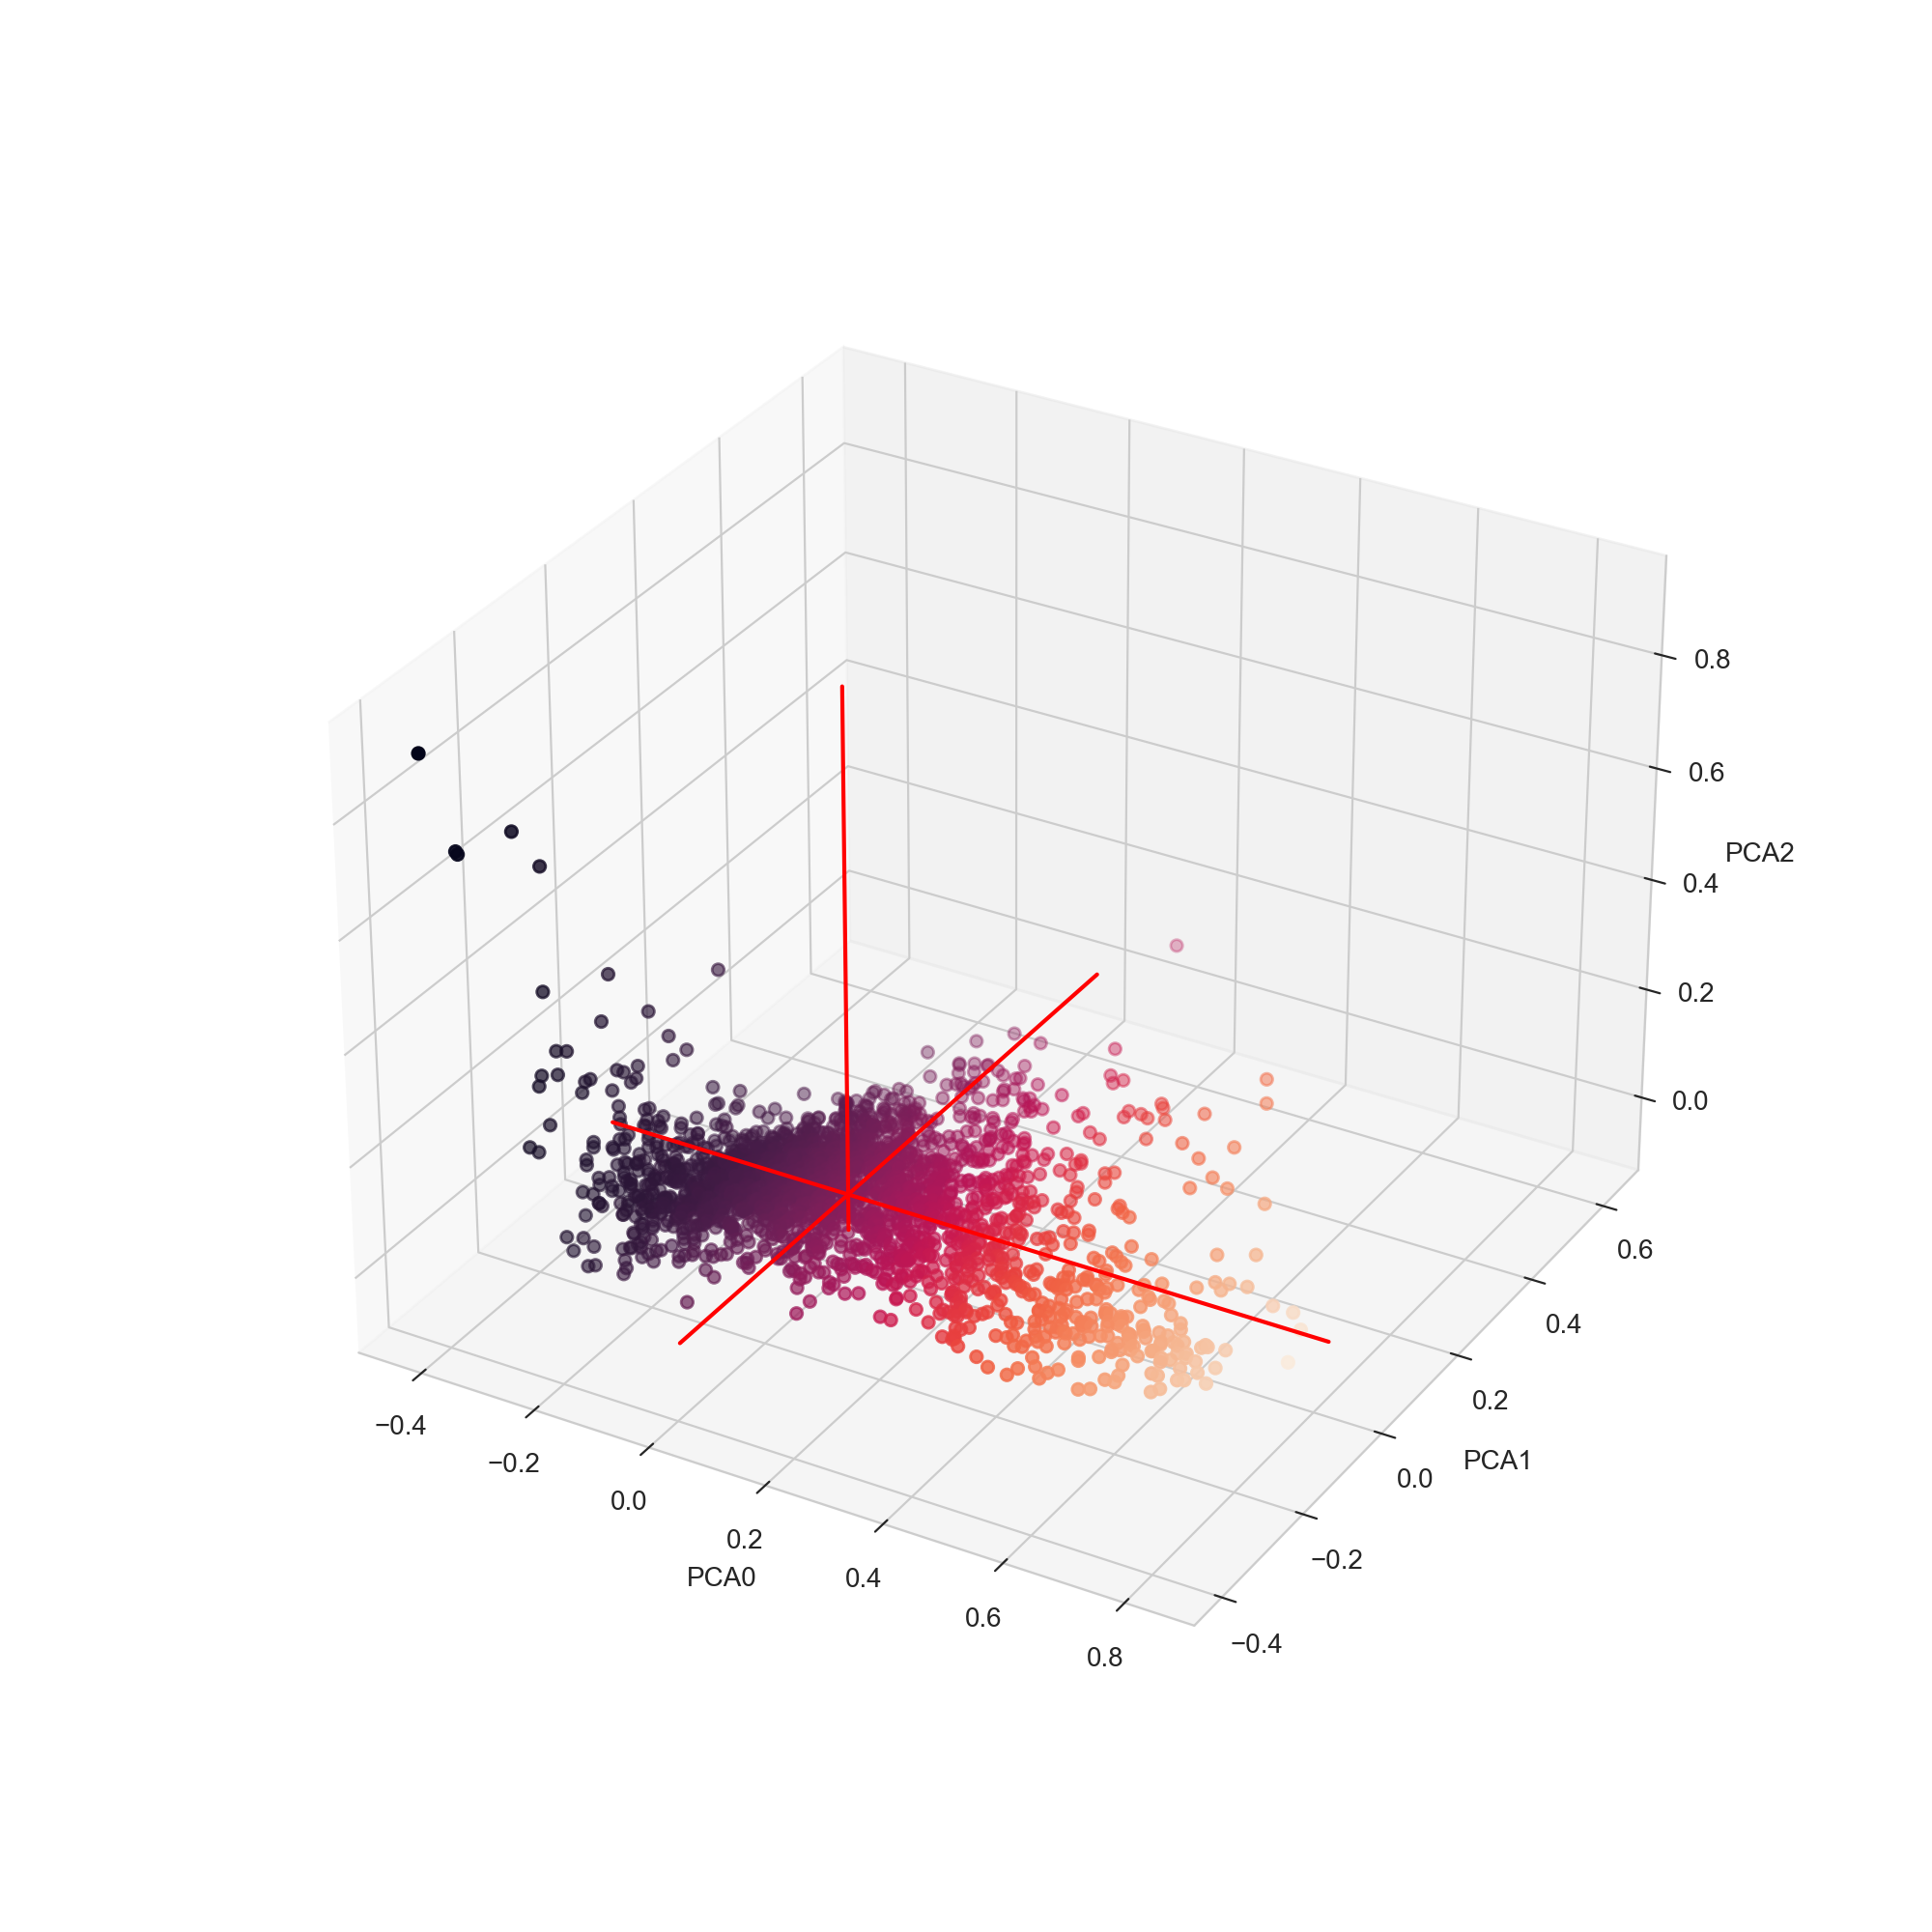

In [302]:
%matplotlib notebook
plot3D(data_PCA_scaled_plot['PCA0'],
       data_PCA_scaled_plot['PCA1'],
       data_PCA_scaled_plot['PCA2'],
       data_PCA_scaled_plot['PCA0'],
      1)



<IPython.core.display.Javascript object>


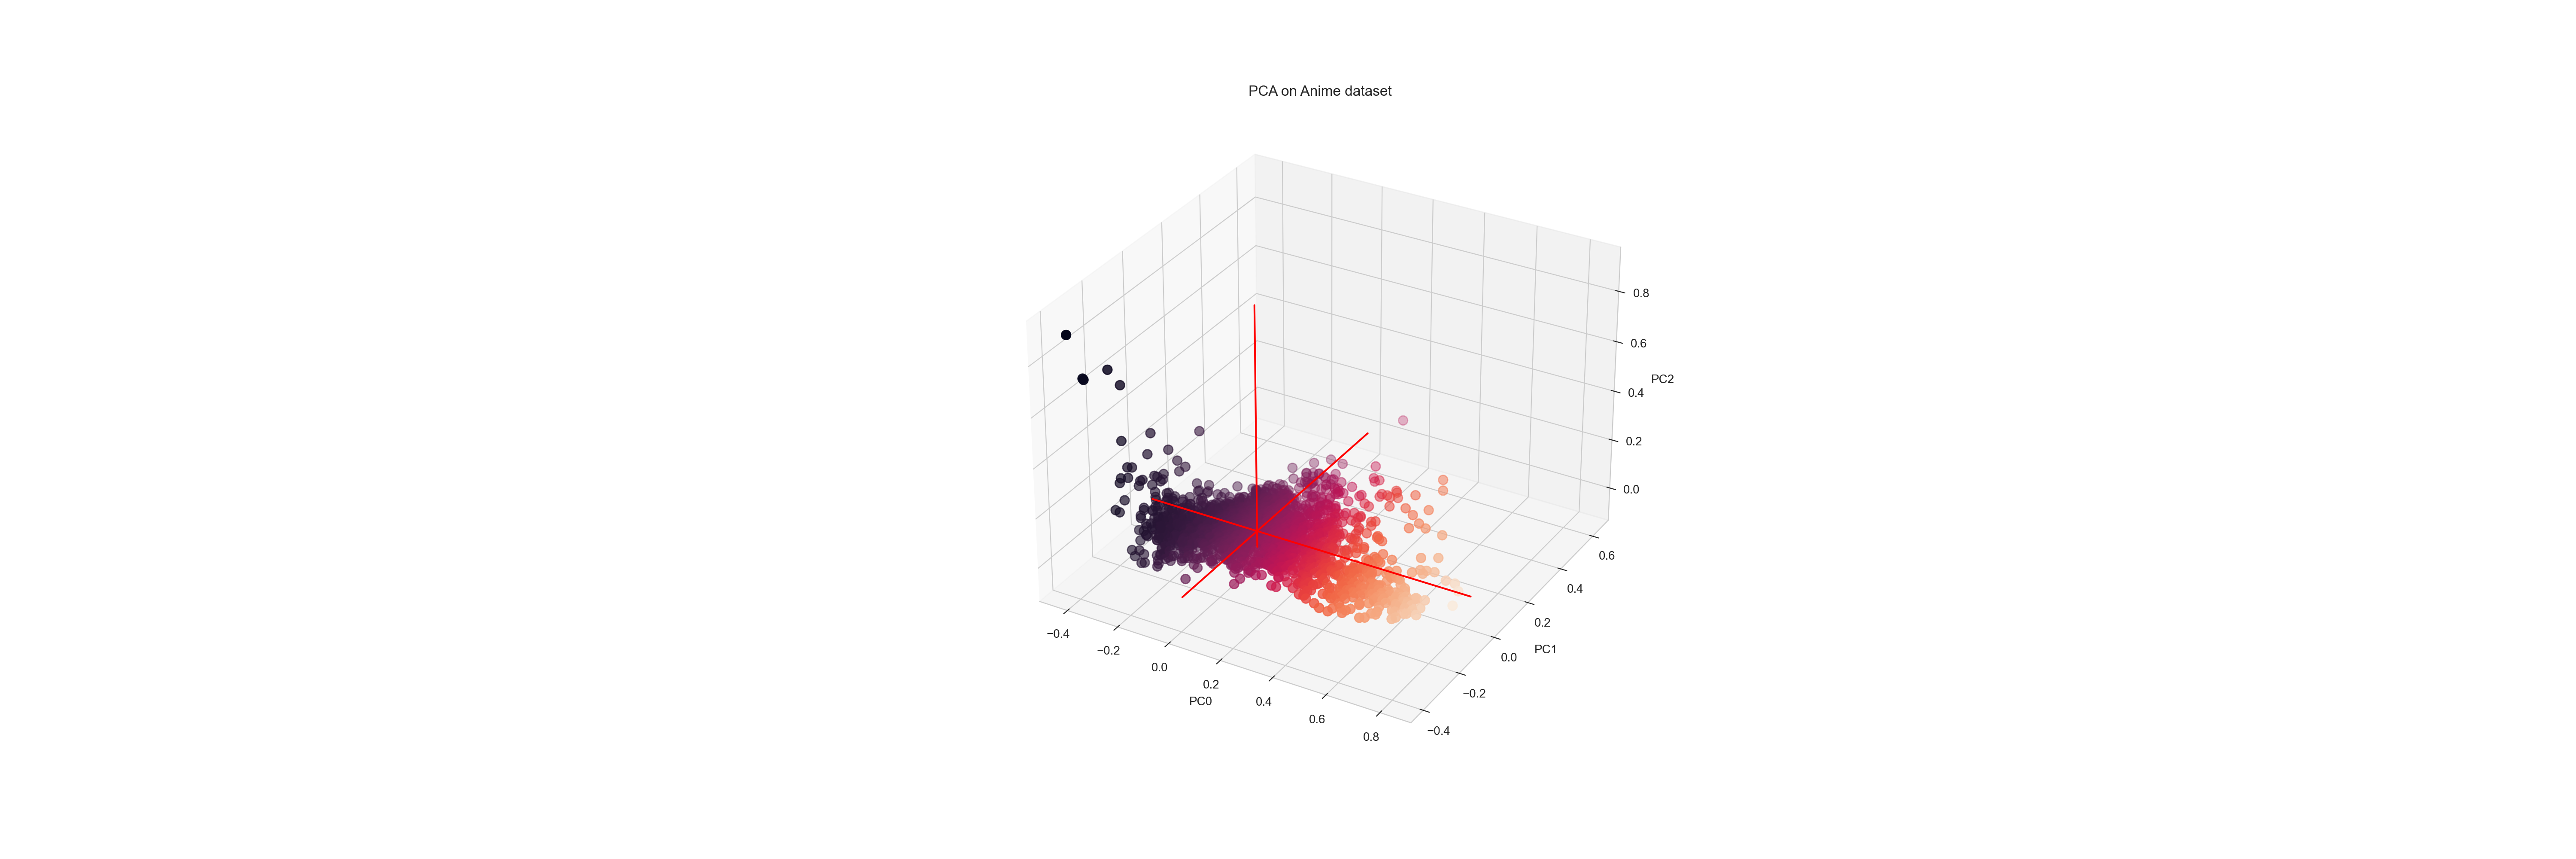

In [266]:

# Plot initialisation
import matplotlib.pyplot as plt
#data4['name']=pd.Categorical(data4['name'])
# to select data_PCA_scaled_plot_sel=data_PCA_scaled_plot.sample(1000)

my_color=data_PCA_scaled_plot['PCA0']
fig = plt.figure(figsize=(30,10))



ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_PCA_scaled_plot['PCA0'], data_PCA_scaled_plot['PCA1'], data_PCA_scaled_plot['PCA2'], c=my_color, s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(data_PCA_scaled_plot['PCA0']), max(data_PCA_scaled_plot['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(data_PCA_scaled_plot['PCA1']), max(data_PCA_scaled_plot['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(data_PCA_scaled_plot['PCA2']), max(data_PCA_scaled_plot['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC0")
ax.set_ylabel("PC1")
ax.set_zlabel("PC2")
ax.set_title("PCA on Anime dataset")
plt.show()

CONCLUSIONS: I will use score_tot to define the most successfull anime



# now I want to know if the first 5 most scored anime are among the high medium or short aring time and the lenght (episodes). So I do a binn.


In [267]:
#combine the data5 and score_tot 

In [268]:
data6=pd.concat([data5, data_PCA_scaled['rating_tot']], axis=1)
data6.head()

mal_id  score            english_name type  episodes  premiered  \
0       1   8.78            Cowboy Bebop   TV        26       1998   
1       6   8.24                  Trigun   TV        26       1998   
2       7   7.27      Witch Hunter Robin   TV        26       2002   
3       8   6.98  Beet the Vandel Buster   TV        52       2004   
4      16   8.06        Honey and Clover   TV        24       2005   

          studios    source         duration  ranked  ...        genres3  \
0         Sunrise  Original  24 min. per ep.    28.0  ...          Drama   
1        Madhouse     Manga  24 min. per ep.   266.0  ...         Comedy   
2         Sunrise  Original  25 min. per ep.  2481.0  ...   Supernatural   
3  Toei Animation     Manga  23 min. per ep.  3710.0  ...   Supernatural   
4       J.C.Staff     Manga  23 min. per ep.   468.0  ...        Romance   

          genres4   genres5  rating_clean  aired_start  aired_stop  \
0          Sci-Fi     Space             R   1998-04-03  1999-04-24   
1           Drama   Shounen         PG-13   1998-04-01  1998-09-30   
2           Drama     Magic         PG-13   2002-07-02  2002-12-24   
3            None      None            PG   2004-09-30  2005-09-29   
4   Slice of Life      None         PG-13   2005-04-15  2005-09-27   

   aired_start_y  aired_stop_y airing_time_days rating_tot  
0           1998          1999         386 days  -0.335277  
1           1998          1998         182 days  -0.263412  
2           2002          2002         175 days  -0.099946  
3           2004          2005         364 days   0.124264  
4           2005          2005         165 days  -0.212560  

[5 rows x 30 columns]

In [270]:
#I will use this slice
data6.head()
data_binn = data6[['mal_id', 'english_name', 'rating_tot', 'episodes', 'aired_start_y','aired_stop_y','airing_time_days',]]
data_binn.head()


mal_id            english_name  rating_tot  episodes  aired_start_y  \
0       1            Cowboy Bebop   -0.335277        26           1998   
1       6                  Trigun   -0.263412        26           1998   
2       7      Witch Hunter Robin   -0.099946        26           2002   
3       8  Beet the Vandel Buster    0.124264        52           2004   
4      16        Honey and Clover   -0.212560        24           2005   

   aired_stop_y airing_time_days  
0          1999         386 days  
1          1998         182 days  
2          2002         175 days  
3          2005         364 days  
4          2005         165 days

In [271]:
#I will do BINNING for airing time
airing_time_labels = ['short', 'medium', 'long', 'very_long']
#I will use Qcat to have class imbalance


data6['airing_time_category'] = pd.qcut(data6['airing_time_days'],4,labels=airing_time_labels)
data6['airing_time_category'].value_counts()


short        895
long         546
very_long    525
medium       391
Name: airing_time_category, dtype: int64

In [319]:
data6__airing_cat= data6.sort_values(by=['rating_tot'], ascending = False)
data6_airing_cat_top5 = data6_airing_cat.iloc[[0,1,2,3,4,5,6,7,8,9],:]
data6_airing_cat_top5
display(data6_airing_cat_top5[['mal_id','english_name','aired_start_y','rating_tot','airing_time_category']])
data6_airing_cat_top5.to_csv('data6_rating_tot_airing_cat_top5.csv')

mal_id                 english_name  aired_start_y  rating_tot  \
1929   34510          Black Cat Detective           1984    0.822584   
1713   31747          Bottom Biting Bug 4           2015    0.802866   
1543   27687          Bottom Biting Bug 3           2014    0.772356   
1377   19755          Bottom Biting Bug 2           2013    0.736331   
1995   35302   Meow Meow Japanese History           2017    0.733529   
783     3834             Starchild Chobin           1974    0.728412   
1016    8130                Mighty Orbots           1984    0.721921   
997     7551    Goliath the Super Fighter           1976    0.709114   
910     5600  Adventures of Little El Cid           1984    0.699425   
712     3131       A Great Super Shot Boy           1984    0.693368   

     airing_time_category  
1929            very_long  
1713                short  
1543                short  
1377            very_long  
1995            very_long  
783                  long  
1016                 long  
997             very_long  
910                 short  
712             very_long

In [459]:
#top5_score+airing y and cat
data6_score_airing_cat= data6.sort_values(by=['score'], ascending = False)
data6_score_airing_cat_top5 = data6_score_airing_cat.iloc[[0,1,2,3,4],:]
data6_score_airing_cat_top5
display(data6_score_airing_cat_top5[['mal_id','english_name','aired_start_y','score','airing_time_category']])


mal_id                     english_name  aired_start_y  score  \
879     5114  Fullmetal Alchemist:Brotherhood           2009   9.19   
2281   40028     Attack on Titan Final Season           2020   9.17   
1051    9253                      Steins;Gate           2011   9.11   
1586   28977                 Gintama Season 4           2015   9.10   
1136   11061                  Hunter x Hunter           2011   9.10   

     airing_time_category  
879             very_long  
2281            very_long  
1051                 long  
1586            very_long  
1136            very_long

In [478]:
data6_score_airing_cat.loc[:,'english_name']
data6_score_airing_cat.loc[data6_score_airing_cat['english_name'] == 'Evangelion%']

Empty DataFrame
Columns: [mal_id, score, english_name, type, episodes, premiered, studios, source, duration, ranked, popularity, members, favorites, watching, completed, on-hold, dropped, plan_to_watch, genres1, genres2, genres3, genres4, genres5, rating_clean, aired_start, aired_stop, aired_start_y, aired_stop_y, airing_time_days, rating_tot, airing_time_category, total_watch, dropped_rate]
Index: []

[0 rows x 33 columns]

In [315]:
#top5_popolarity+airing y and cat
data6_pop_airing_cat= data6.sort_values(by=['popularity'], ascending = False)
data6_pop_airing_cat_top5 = data6_pop_airing_cat.iloc[[0,1,2,3,4],:]
data6_pop_airing_cat_top5
display(data6_pop_airing_cat_top5[['mal_id','english_name','aired_start_y','popularity','airing_time_category']])
data6_pop_airing_cat_top5.to_csv('data6_pop_airing_cat_top5.csv')

mal_id                english_name  aired_start_y  popularity  \
1929   34510         Black Cat Detective           1984       12953   
1713   31747         Bottom Biting Bug 4           2015       12386   
1995   35302  Meow Meow Japanese History           2017       12283   
783     3834            Starchild Chobin           1974       12057   
997     7551   Goliath the Super Fighter           1976       11914   

     airing_time_category  
1929            very_long  
1713                short  
1995            very_long  
783                  long  
997             very_long

In [316]:
#top5_favorites+airing y and cat
data6_fav_airing_cat= data6.sort_values(by=['favorites'], ascending = False)
data6_fav_airing_cat_top5 = data6_fav_airing_cat.iloc[[0,1,2,3,4],:]
data6_fav_score_airing_cat_top5
display(data6_fav_score_airing_cat_top5[['mal_id','english_name','aired_start_y','favorites','airing_time_category']])
data6_fav_airing_cat_top5.to_csv('data6_fav_airing_cat_top5.csv')

mal_id                     english_name  aired_start_y  favorites  \
879     5114  Fullmetal Alchemist:Brotherhood           2009     183914   
1051    9253                      Steins;Gate           2011     148452   
1136   11061                  Hunter x Hunter           2011     147274   
473     1535                       Death Note           2006     145201   
1293   16498                  Attack on Titan           2013     129844   

     airing_time_category  
879             very_long  
1051                 long  
1136            very_long  
473             very_long  
1293                 long

In [295]:
data6_airing_cat_top5.to_csv('data6_airing_cat_top5.csv')

<IPython.core.display.Javascript object>


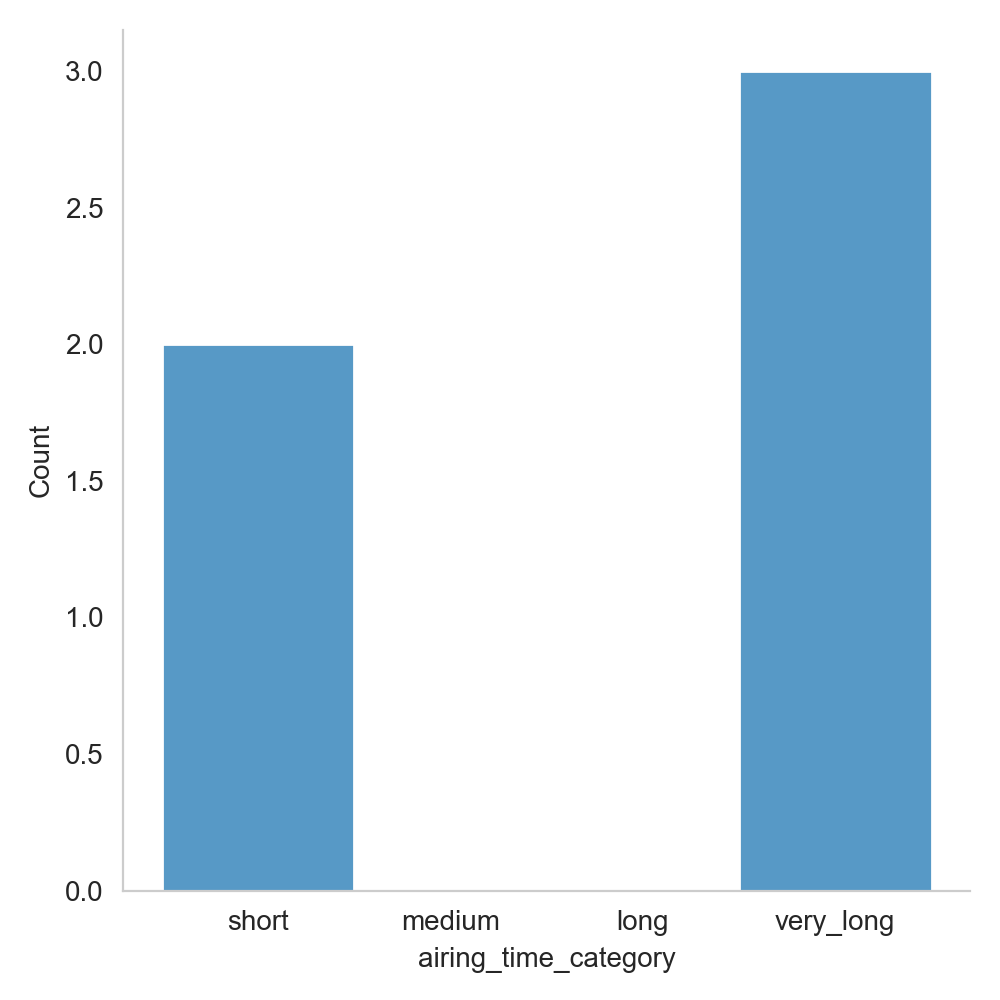

In [273]:

sns.displot(data6_airing_cat_top5['airing_time_category'], bins=20)

In [276]:
data6_airing_cat_score= data6.sort_values(by=['score'], ascending = False)
data6_airing_cat_score_top5 = data6_airing_cat_score.iloc[[0,1,2,3,4],:]
data6_airing_cat_score_top5
data6_airing_cat_score_top5[['english_name','aired_start_y','score','rating_tot','airing_time_category']]

english_name  aired_start_y  score  rating_tot  \
879   Fullmetal Alchemist:Brotherhood           2009   9.19   -0.421695   
2281     Attack on Titan Final Season           2020   9.17   -0.349858   
1051                      Steins;Gate           2011   9.11   -0.399678   
1586                 Gintama Season 4           2015   9.10   -0.315373   
1136                  Hunter x Hunter           2011   9.10   -0.398226   

     airing_time_category  
879             very_long  
2281            very_long  
1051                 long  
1586            very_long  
1136            very_long

<IPython.core.display.Javascript object>


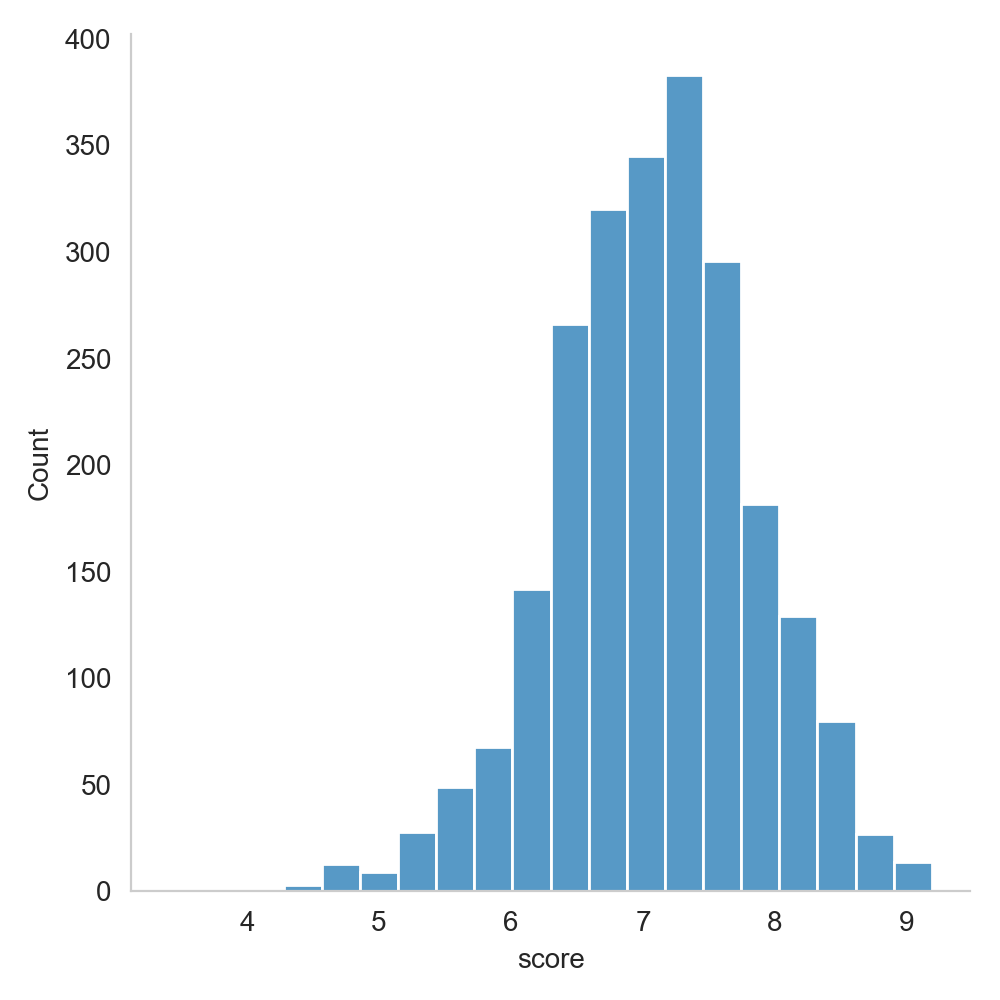

<IPython.core.display.Javascript object>


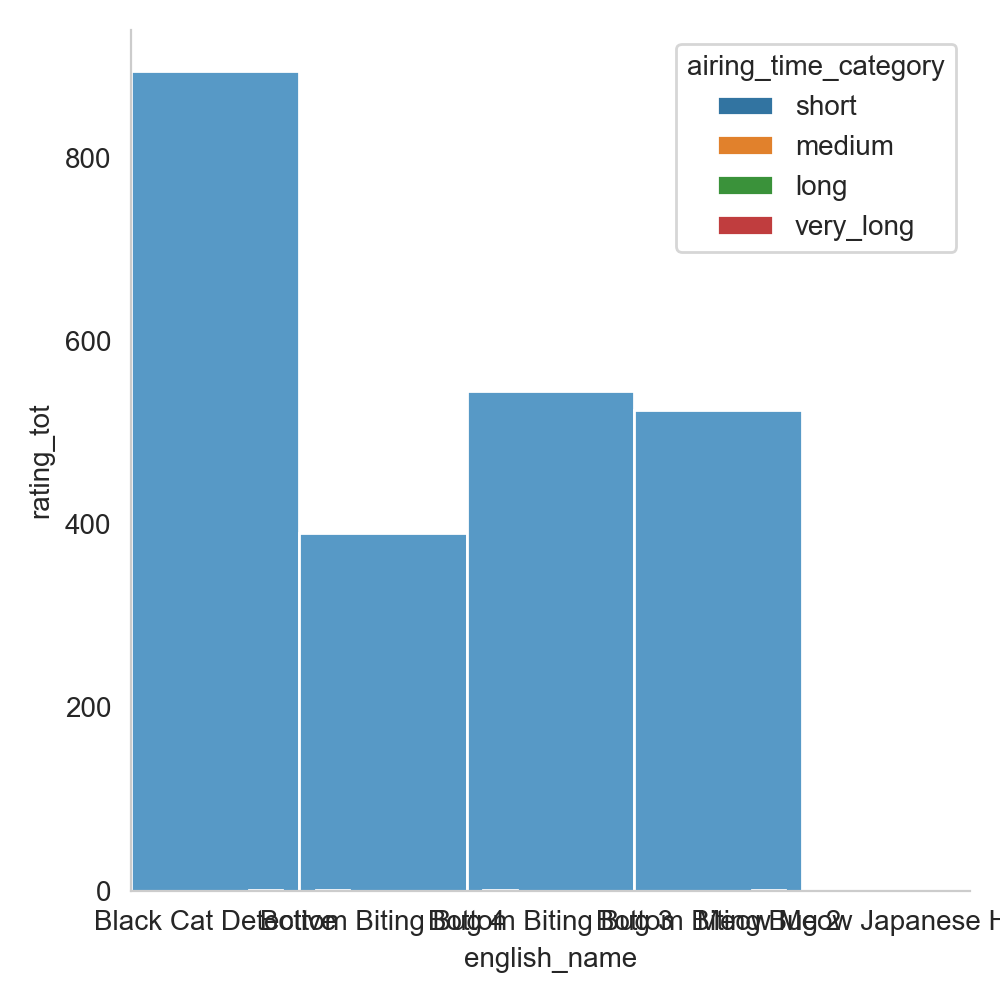

In [275]:
sns.displot(data6['score'], bins=20)
sns.displot(data6['airing_time_category'], bins=20)

In [277]:
sns.barplot(x="english_name", y="rating_tot", hue="airing_time_category", data=data6_airing_cat_top5)


<AxesSubplot:xlabel='english_name', ylabel='rating_tot'>

<IPython.core.display.Javascript object>


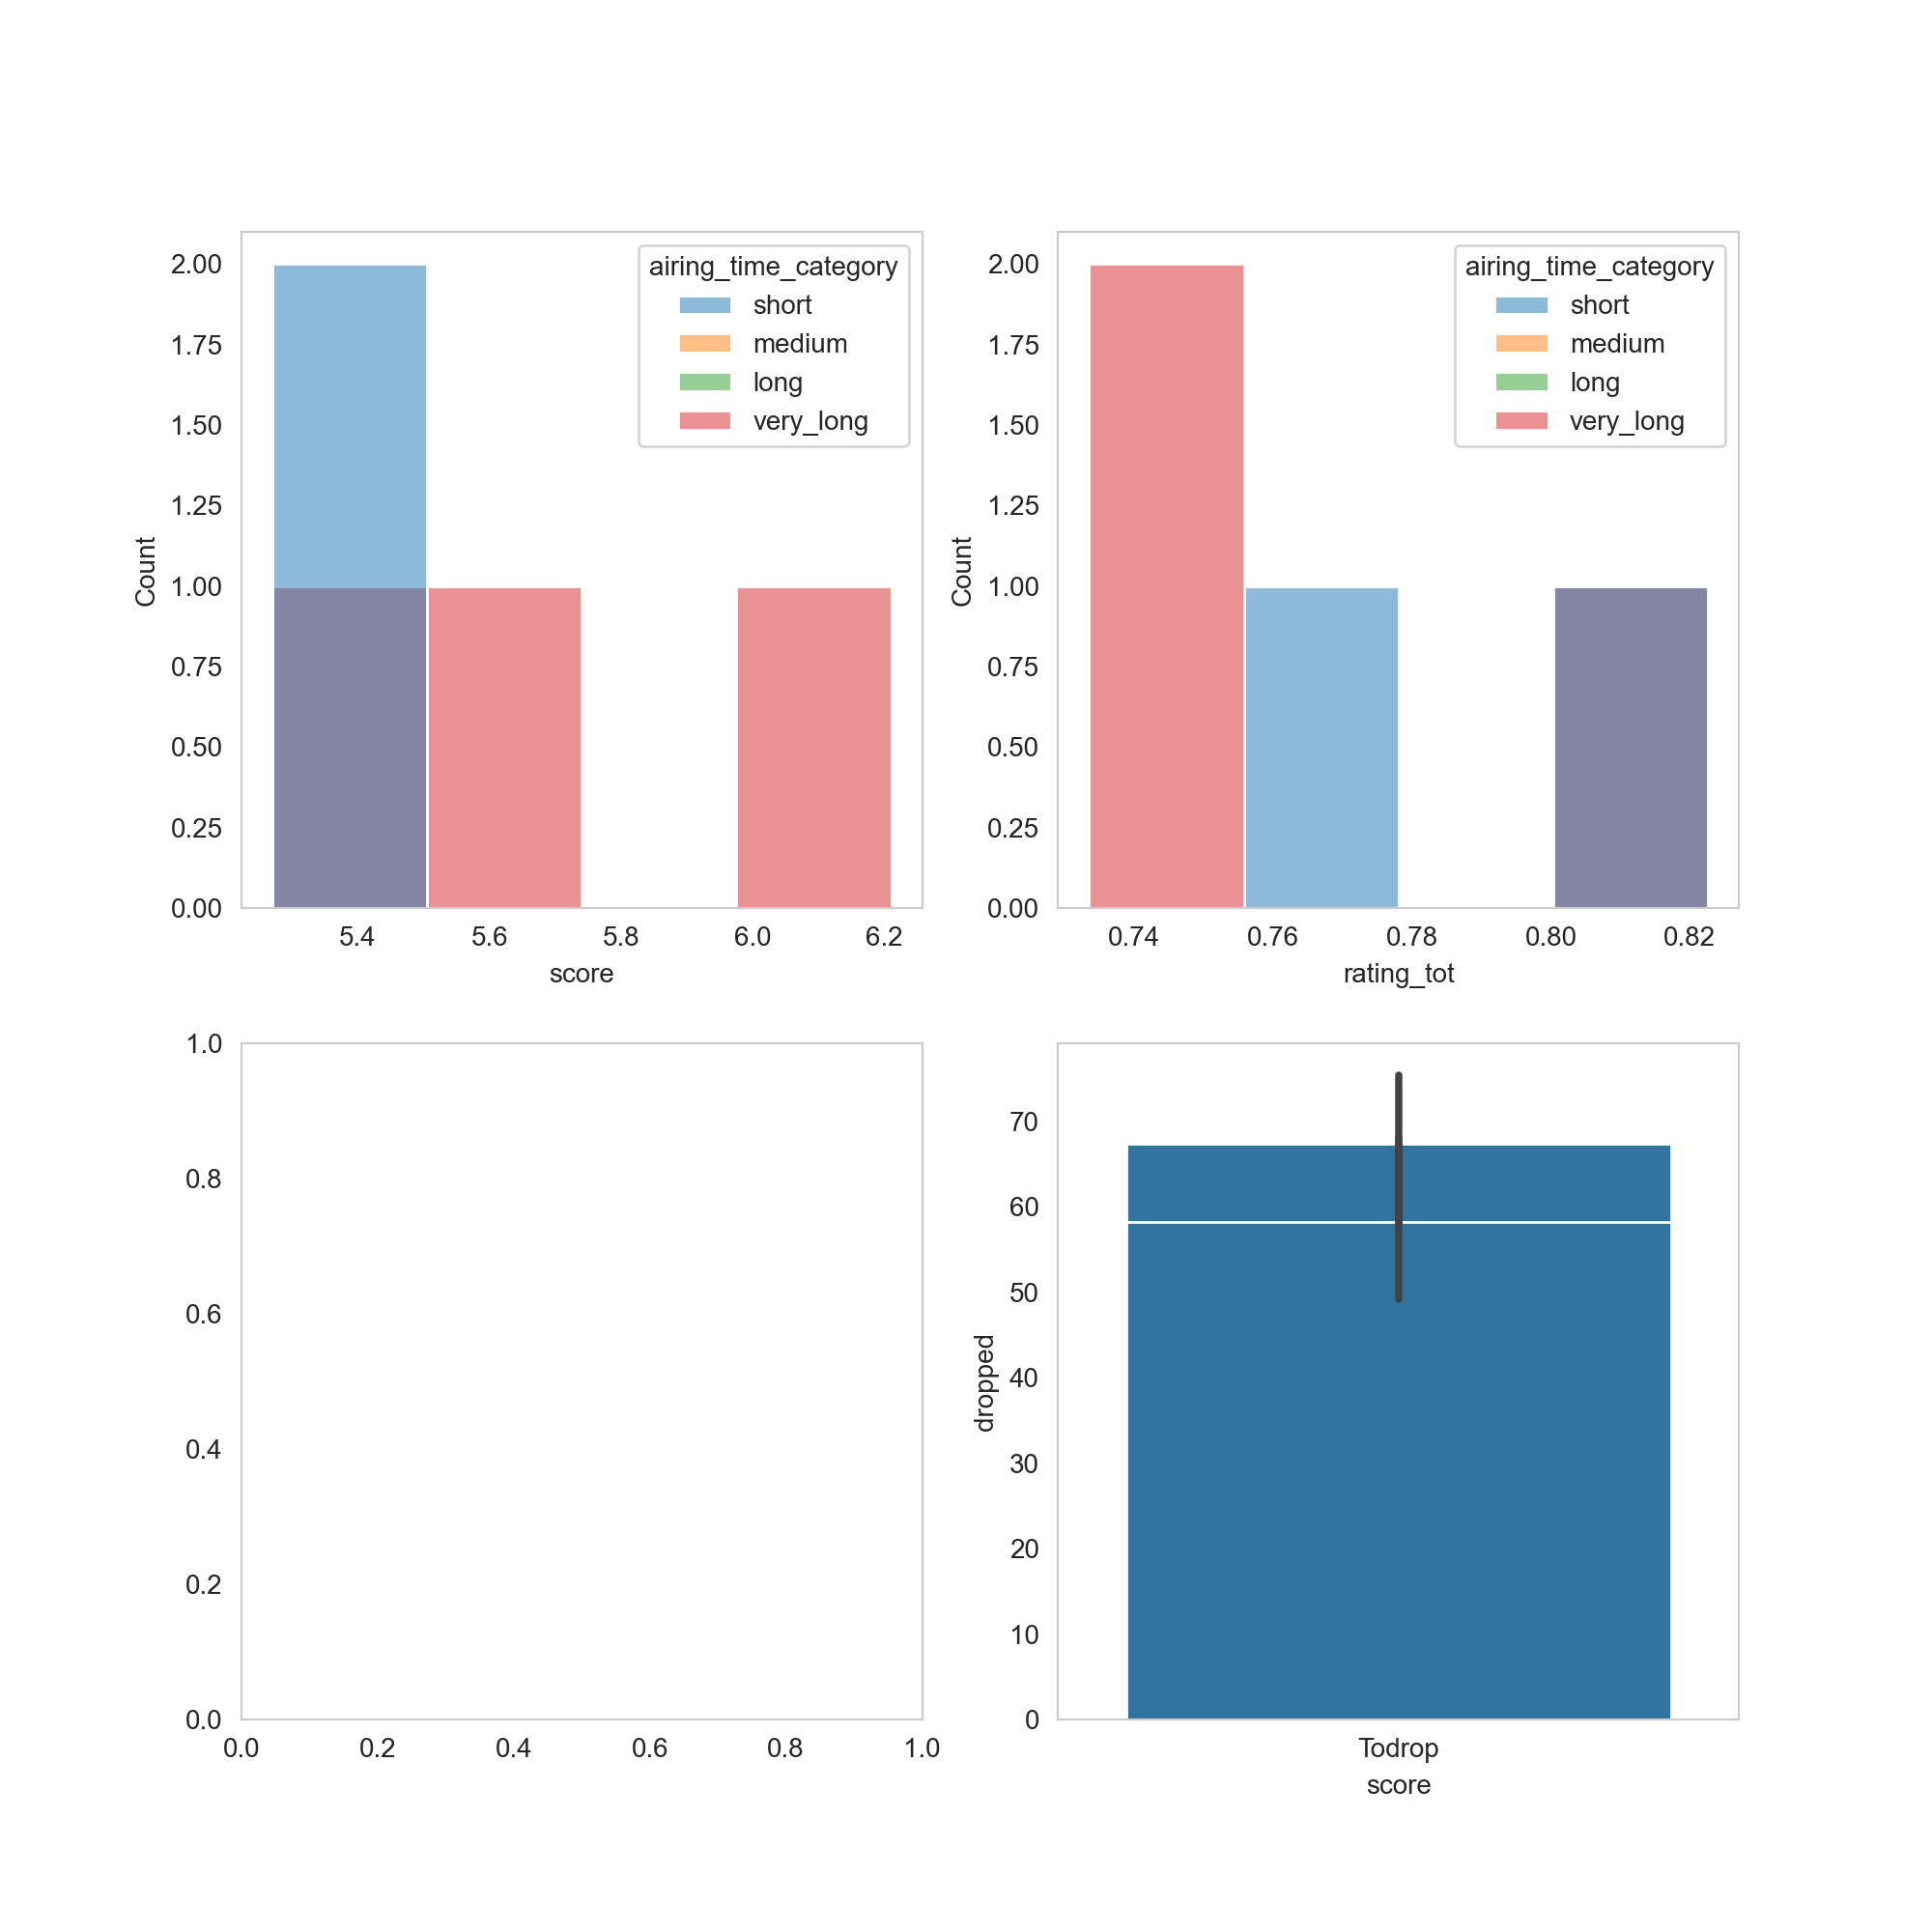

In [278]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.histplot(x='score', hue='airing_time_category', data=data6_airing_cat_top5, ax=ax[0,0])
sns.histplot(x='rating_tot', hue='airing_time_category', data=data6_airing_cat_top5, ax=ax[0,1])
#sns.histplot(x='score', hue='airing_time_category', data=data5_anime_vs_airing_very_long, ax=ax[1,0])
#sns.histplot(x='popularity', hue='airing_time_category', data=data5_anime_vs_airing_very_long, ax=ax[1,1])
plt.show()
# It appears that the most popular and scored are the very long, also the short ones are the lass popular. bit Not the less scored. 

# START analysis on MOVIES only 

In [279]:
data_U_clean.type
print(data_U_clean.type.unique())

data_movies = data_U_clean[data_U_clean['type']== 'Movie']
data_movies.type

['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'Todrop']


1        Movie
21       Movie
22       Movie
24       Movie
27       Movie
         ...  
17452    Movie
17473    Movie
17478    Movie
17508    Movie
17518    Movie
Name: type, Length: 2854, dtype: object

In [280]:
data_movies.head()

mal_id                                               name score  \
1        5                    Cowboy Bebop: Tengoku no Tobira  8.39   
21      31           Neon Genesis Evangelion: Death & Rebirth  7.45   
22      32     Neon Genesis Evangelion: The End of Evangelion  8.51   
24      43                                   Koukaku Kidoutai  8.29   
27      46  Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...  7.56   

                                     english_name   type  episodes  \
1                          Cowboy Bebop:The Movie  Movie         1   
21        Neon Genesis Evangelion:Death & Rebirth  Movie         1   
22  Neon Genesis Evangelion:The End of Evangelion  Movie         1   
24                             Ghost in the Shell  Movie         1   
27                   Samurai X:The Motion Picture  Movie         1   

           aired premiered                 studios    source  ... completed  \
1    Sep 1, 2001    Todrop                   Bones  Original  ...    208333   
21  Mar 15, 1997    Todrop  Gainax, Production I.G  Original  ...    146202   
22  Jul 19, 1997    Todrop  Gainax, Production I.G  Original  ...    482918   
24  Nov 18, 1995    Todrop          Production I.G     Manga  ...    325682   
27  Dec 20, 1997    Todrop                  Gallop     Manga  ...     34481   

   on-hold  dropped  plan_to_watch  genres1      genres2         genres3  \
1     1935      770          57964   Action        Drama          Sci-Fi   
21    1069      961          30508    Drama        Mecha          Sci-Fi   
22    2462     1499          77146   Sci-Fi     Dementia           Drama   
24    3404     1927         129114   Action        Mecha   Psychological   
27     438      228           8640  Samurai   Historical         Shounen   

    genres4  genres5  rating_clean  
1     Space     None             R  
21     None     None             R  
22    Mecha     None            R+  
24   Sci-Fi   Seinen            R+  
27     None     None             R  

[5 rows x 26 columns]

In [281]:
data_movies_drop=data_movies.drop(columns=['source','premiered','english_name', 'on-hold'], axis=1)
display(data_movies_drop.head())
data_movies_drop.shape

mal_id                                               name score   type  \
1        5                    Cowboy Bebop: Tengoku no Tobira  8.39  Movie   
21      31           Neon Genesis Evangelion: Death & Rebirth  7.45  Movie   
22      32     Neon Genesis Evangelion: The End of Evangelion  8.51  Movie   
24      43                                   Koukaku Kidoutai  8.29  Movie   
27      46  Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...  7.56  Movie   

    episodes         aired                 studios       duration  ranked  \
1          1   Sep 1, 2001                   Bones  1 hr. 55 min.   159.0   
21         1  Mar 15, 1997  Gainax, Production I.G  1 hr. 44 min.  1742.0   
22         1  Jul 19, 1997  Gainax, Production I.G  1 hr. 27 min.   102.0   
24         1  Nov 18, 1995          Production I.G  1 hr. 22 min.   236.0   
27         1  Dec 20, 1997                  Gallop  1 hr. 31 min.  1397.0   

    popularity  ...  watching  completed  dropped  plan_to_watch  genres1  \
1          518  ...      4143     208333      770          57964   Action   
21         833  ...      1941     146202      961          30508    Drama   
22         195  ...      8055     482918     1499          77146   Sci-Fi   
24         265  ...      8152     325682     1927         129114   Action   
27        2411  ...       547      34481      228           8640  Samurai   

        genres2         genres3  genres4  genres5 rating_clean  
1         Drama          Sci-Fi    Space     None            R  
21        Mecha          Sci-Fi     None     None            R  
22     Dementia           Drama    Mecha     None           R+  
24        Mecha   Psychological   Sci-Fi   Seinen           R+  
27   Historical         Shounen     None     None            R  

[5 rows x 22 columns]

(2854, 22)

In [282]:
data_movies_drop.columns

Index(['mal_id', 'name', 'score', 'type', 'episodes', 'aired', 'studios',
       'duration', 'ranked', 'popularity', 'members', 'favorites', 'watching',
       'completed', 'dropped', 'plan_to_watch', 'genres1', 'genres2',
       'genres3', 'genres4', 'genres5', 'rating_clean'],
      dtype='object')

In [283]:
data_movies_drop['studios'].value_counts()

Todrop                              1338
Toei Animation                       259
Sunrise                               80
Shin-Ei Animation                     77
TMS Entertainment                     72
                                    ... 
Madhouse, Telecom Animation Film       1
Tamura Shigeru Studio                  1
Yamato Works                           1
Production I.G, animate Film           1
ORENDA                                 1
Name: studios, Length: 267, dtype: int64

In [284]:
Top_scored_movies= data_movies_drop.sort_values(by=['score'], ascending = False)
Top_scored_movies[['name']]
Top_scored_movies = Top_scored_movies.iloc[[0,1,2,3,4],:]
Top_scored_movies
Top_scored_movies[['name','score','completed','dropped','favorites']]

name   score  completed  \
8091                Taabou no Ryuuguusei Daitanken  Todrop         70   
8567  Sore Ike! Anpanman: Kokin-chan to Aoi Namida  Todrop         80   
9258     Little Polar Bear: Shirokuma-kun, Doko e?  Todrop         70   
9247                         Yowamushi Chinsengumi  Todrop         67   
9240                               Chuuchuu Banban  Todrop         50   

      dropped  favorites  
8091       53          0  
8567       54          0  
9258       46          0  
9247       78          0  
9240       60          0

In [285]:
sns.barplot(x="score", y="completed", data=Top_scored_movies)
plt.show()
sns.barplot(x="score", y="dropped", data=Top_scored_movies)
plt.show()
#scored anime top5 according to the number of users that finished it 

In [286]:
Top_scored_movies= data_movies_drop.sort_values(by=['popularity'], ascending = False)
Top_scored_movies[['popularity']]
Top_scored_movies = Top_scored_movies.iloc[[0,1,2,3,4],:]
Top_scored_movies
Top_scored_movies[['name','score', 'completed']]

name   score  completed
16220  King of Prism All Stars: Prism Show☆Best Ten  Todrop         30
17434                                      Ficfyon7  Todrop         18
16935                                  Nanjung Ilgi  Todrop          7
16994        Hei Mao Jing Zhan Zhi Fei Cui Zhi Xing  Todrop         10
16885                           Ujudaejang Aekkunun  Todrop          6

<IPython.core.display.Javascript object>


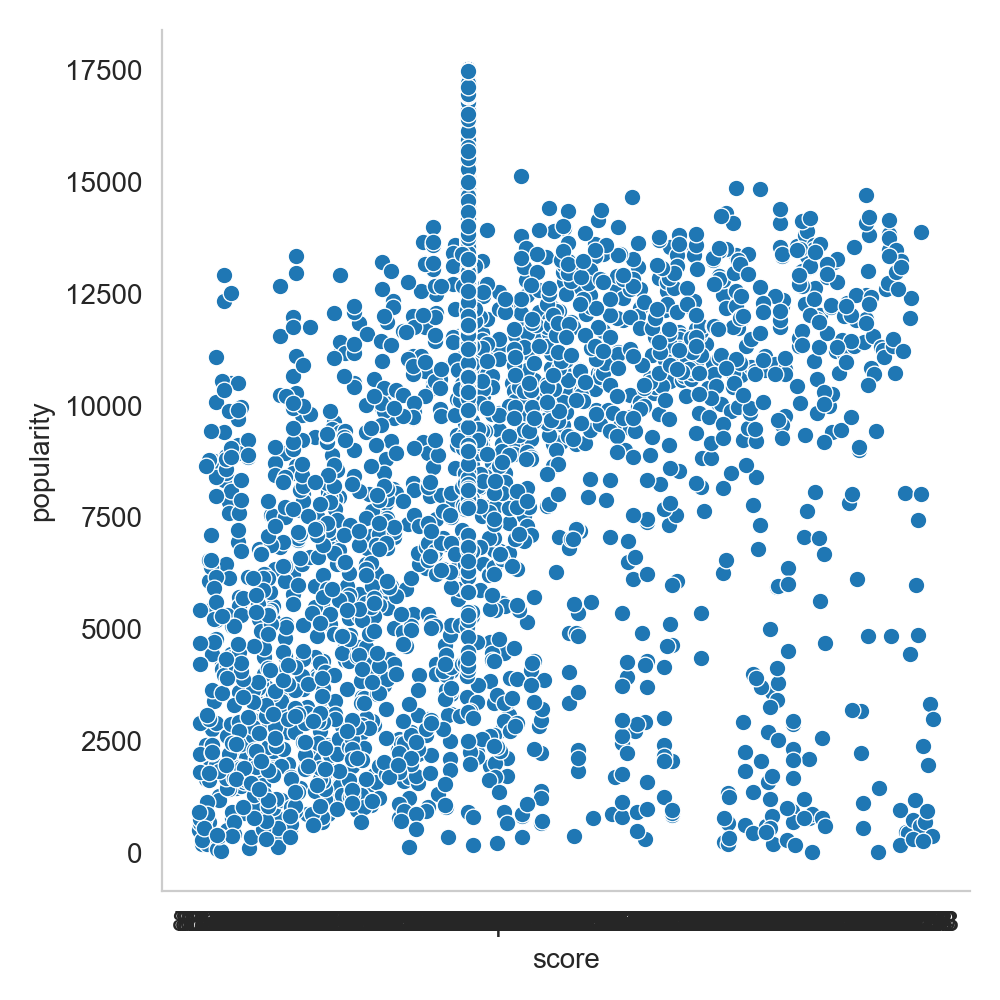

In [287]:
sns.relplot(data=data_movies_drop, x="score", y="popularity")

<IPython.core.display.Javascript object>


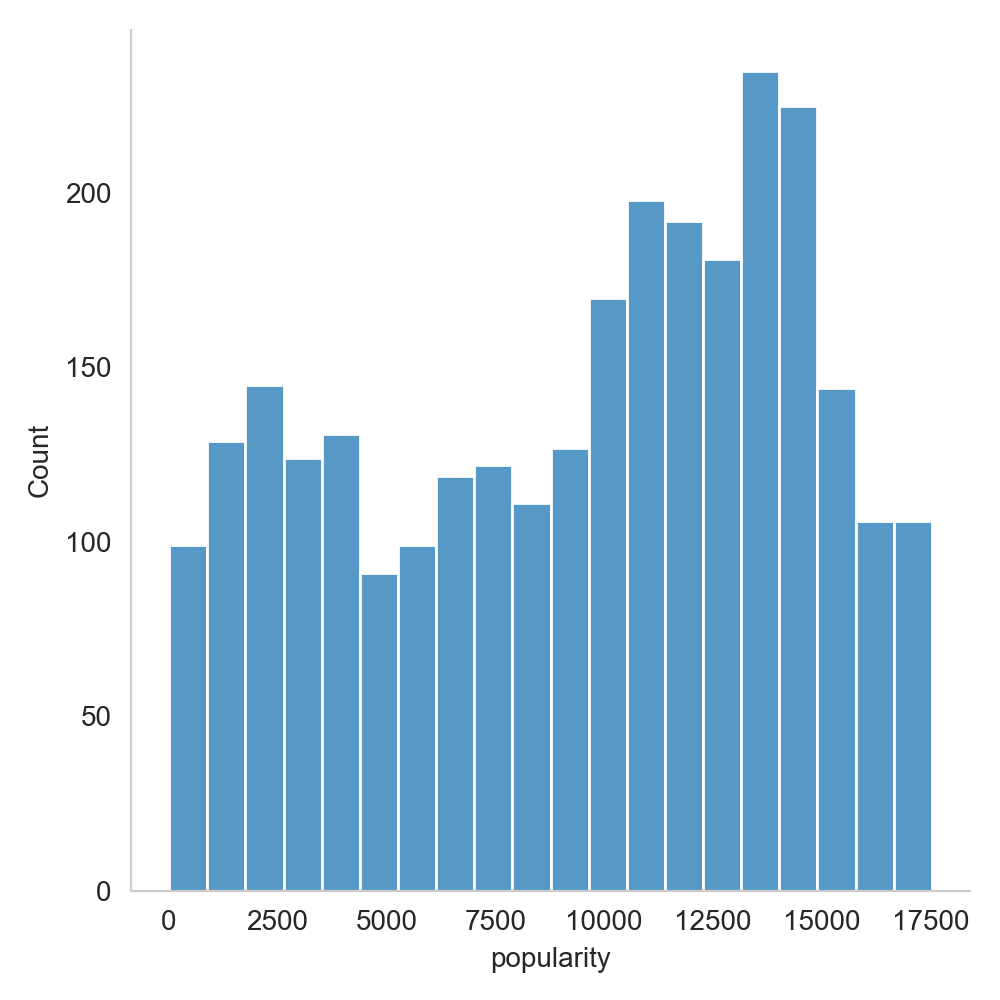

array([  518,   833,   195, ...,  4351, 11802, 10316])

In [288]:

sns.displot(data_movies_drop['popularity'], bins=20)
data_movies_drop['score'].unique()
data_movies_drop['popularity'].unique()

In [289]:
# studios that are most successfull --> filter
# model to predict the most succesfull studios? 
# anime raccomandation?
# predict the anime that can be likely that is higher scored or popular? 

# Check correlation between lenght and rating_tot


<IPython.core.display.Javascript object>


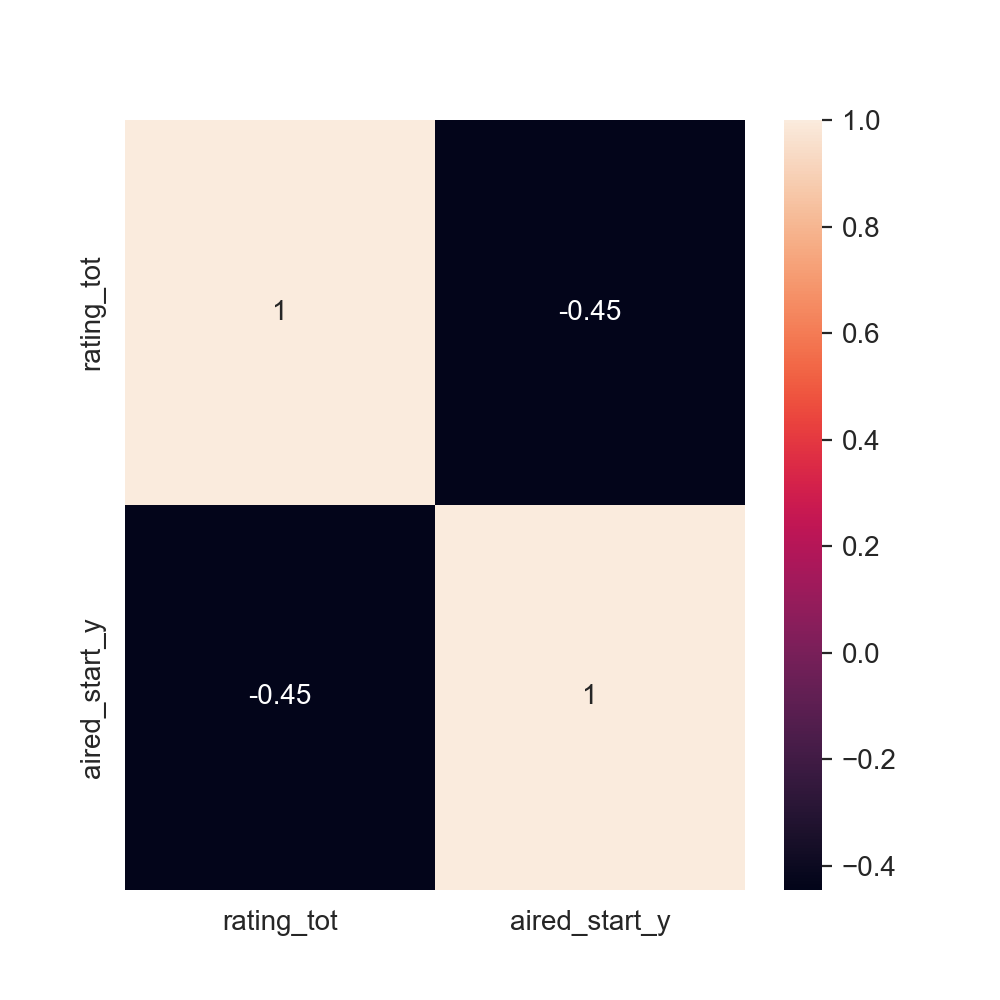

<AxesSubplot:>

In [323]:
correlations_matrix = data6_airing_cat[['rating_tot', 'aired_start_y']].corr()
fig, ax=plt.subplots (figsize =(5,5))
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
#plt.show()

# Linear regression to model droping 

In [303]:
data6.to_excel('data6.xlsx')

In [291]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first') # The option drop='first' drops one of the possible values.
from sklearn.linear_model import LogisticRegression

In [384]:
data_reg=data6.drop(['mal_id','type','english_name','plan_to_watch','aired_start','aired_stop','duration'], axis=1)
data_reg.head()
#data_reg.isna().sum()
#data_reg.dtypes

score  episodes  premiered         studios    source  ranked  popularity  \
0   8.78        26       1998         Sunrise  Original    28.0          39   
1   8.24        26       1998        Madhouse     Manga   266.0         201   
2   7.27        26       2002         Sunrise  Original  2481.0        1467   
3   6.98        52       2004  Toei Animation     Manga  3710.0        4369   
4   8.06        24       2005       J.C.Staff     Manga   468.0         687   

   members  favorites  watching  ...     genres2        genres3  \
0  1251960      61971    105808  ...   Adventure          Drama   
1   558913      12944     29113  ...      Sci-Fi         Comedy   
2    94683        587      4300  ...     Mystery   Supernatural   
3    13224         18       642  ...     Fantasy   Supernatural   
4   214499       4101     11909  ...       Drama        Romance   

          genres4   genres5 rating_clean aired_start_y aired_stop_y  \
0          Sci-Fi     Space            R          1998         1999   
1           Drama   Shounen        PG-13          1998         1998   
2           Drama     Magic        PG-13          2002         2002   
3            None      None           PG          2004         2005   
4   Slice of Life      None        PG-13          2005         2005   

  airing_time_days rating_tot  airing_time_category  
0         386 days  -0.335277             very_long  
1         182 days  -0.263412             very_long  
2         175 days  -0.099946                  long  
3         364 days   0.124264             very_long  
4         165 days  -0.212560                  long  

[5 rows x 24 columns]

In [385]:
data6.to_csv('data_reg_anime.csv')

In [386]:
data_reg['airing_time_days'] = data_reg.airing_time_days.dt.days

<IPython.core.display.Javascript object>


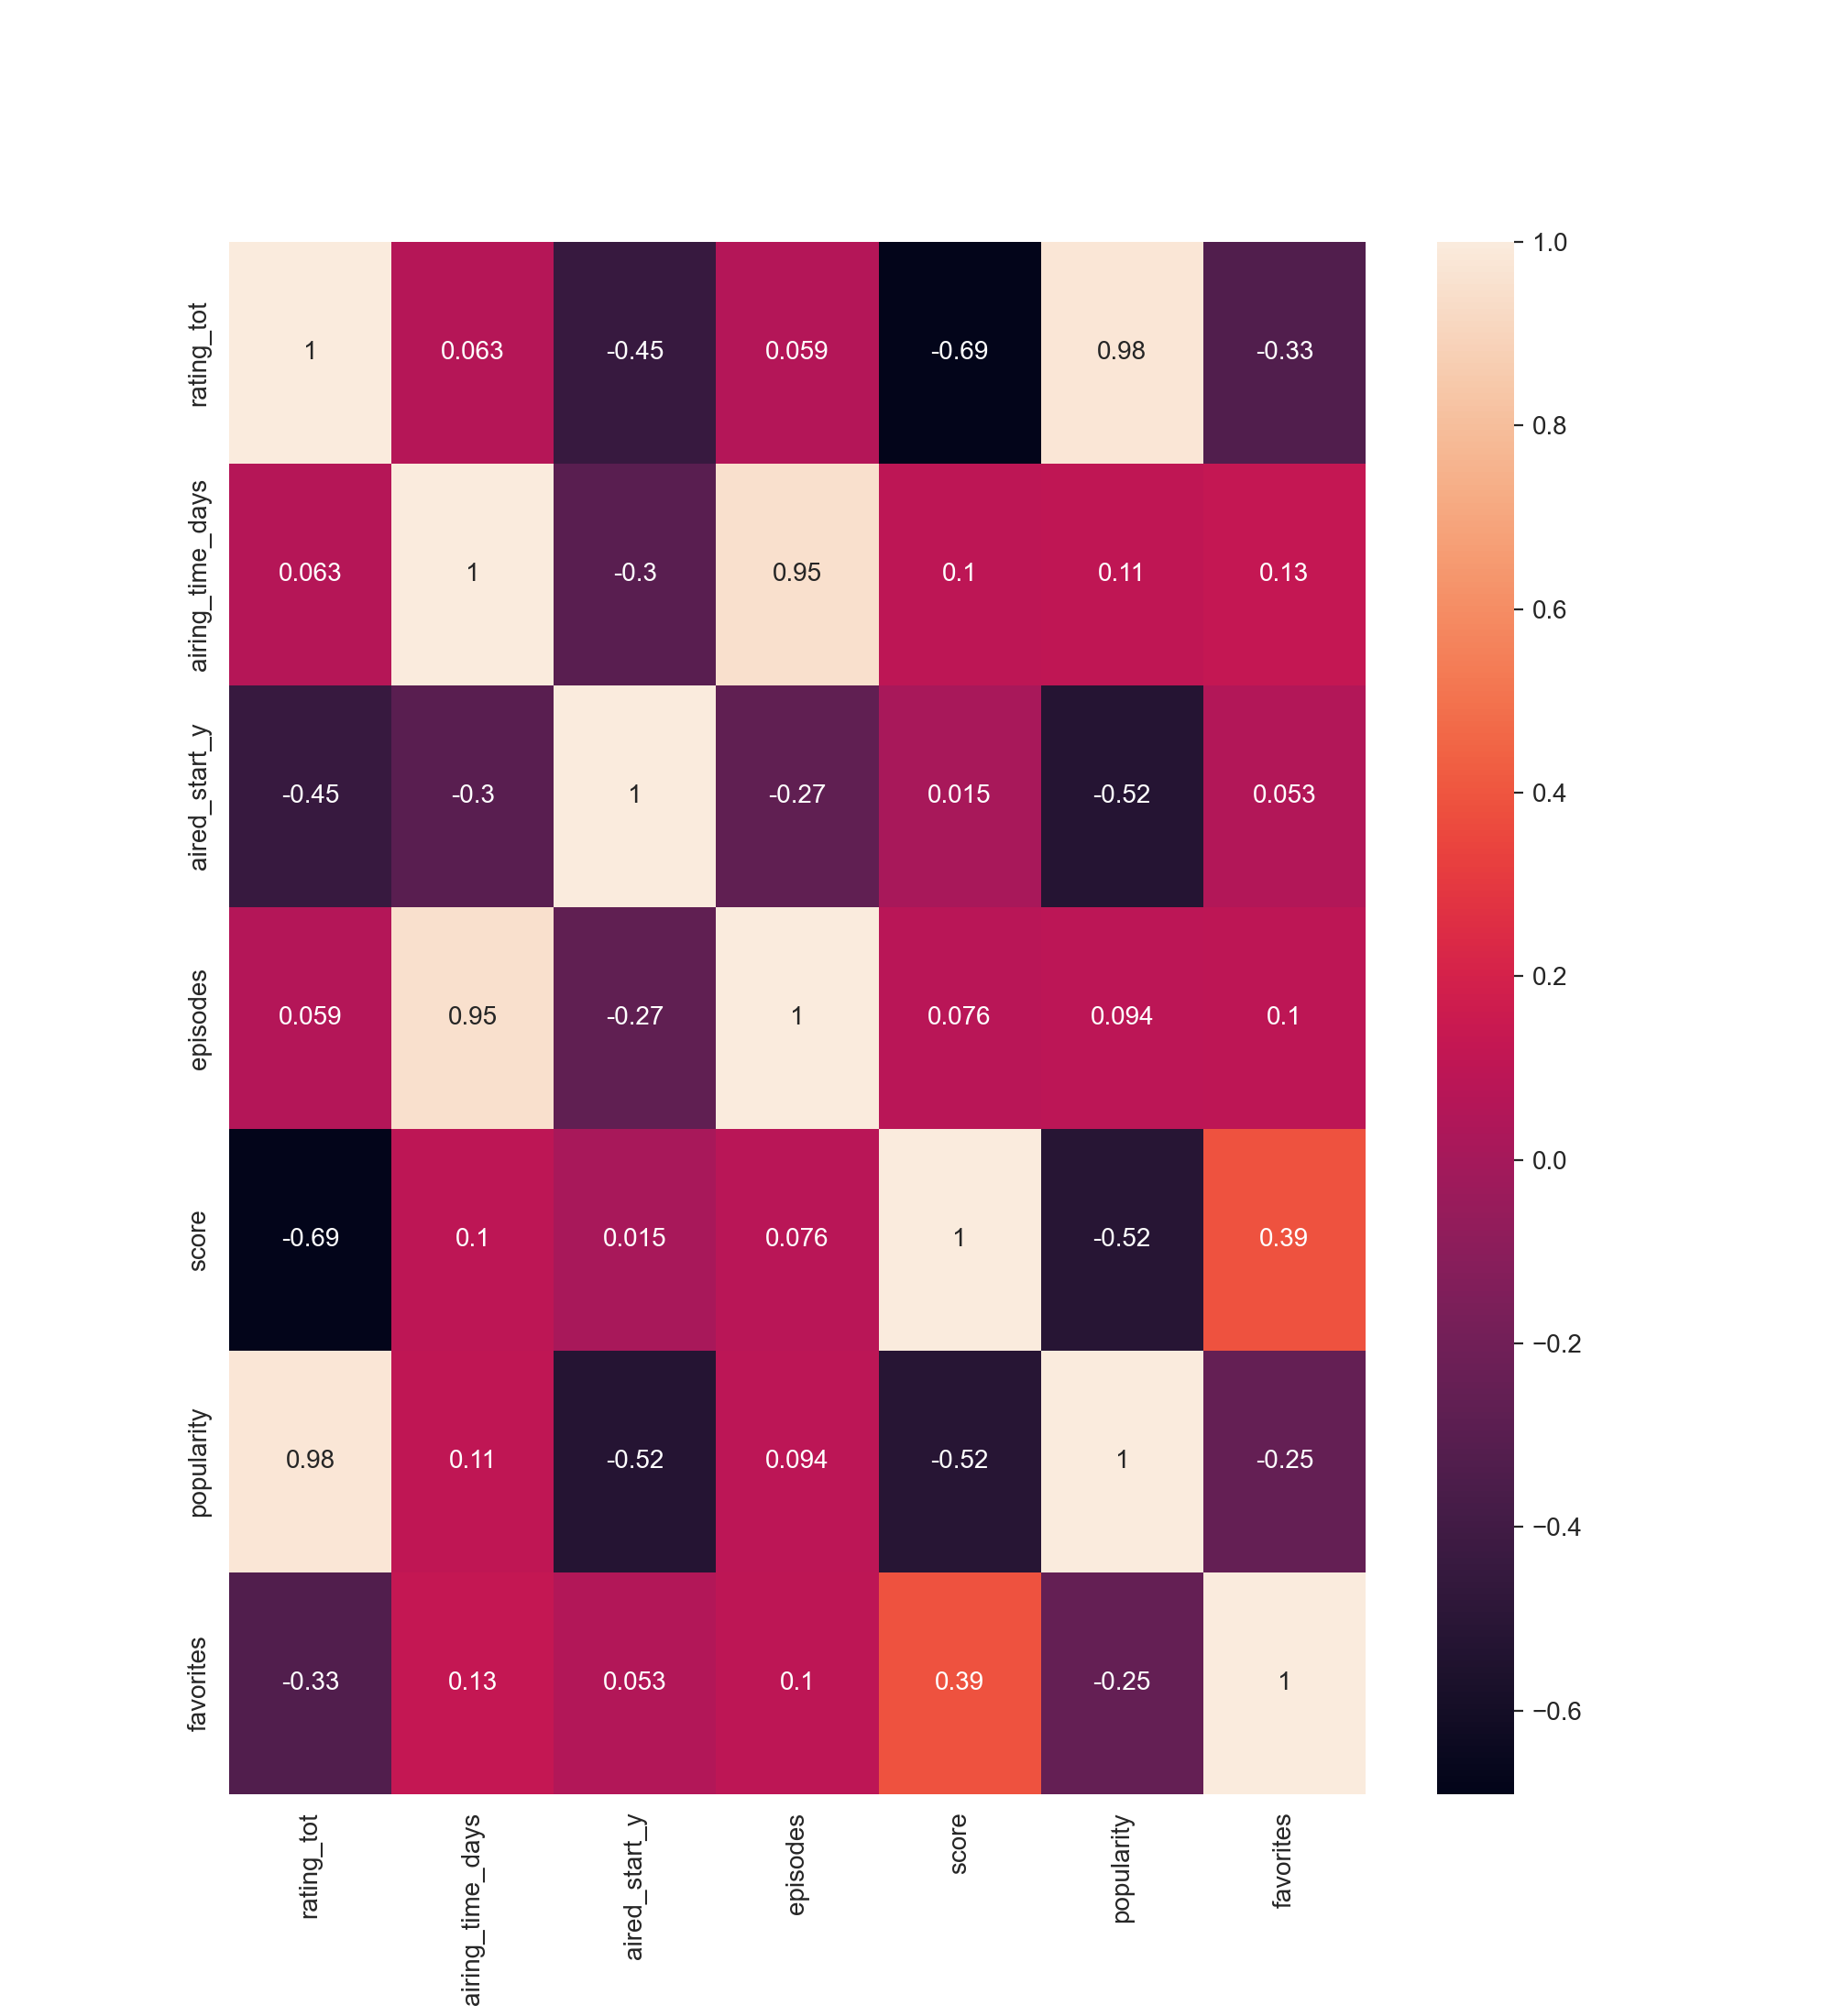

<AxesSubplot:>

In [387]:
correlations_matrix = data_reg[['rating_tot','airing_time_days', 'aired_start_y', 'episodes','score', 'popularity','favorites']].corr()
fig, ax=plt.subplots (figsize =(10,11))
sns.heatmap(correlations_matrix, annot=True) 

X-y SPLIT

In [388]:
data_reg['total_watch'] = data_reg['completed'] + data_reg['dropped'] + data_reg['on-hold']
data_reg['dropped_rate'] =data_reg['dropped']/ data_reg['total_watch'] 
data_reg['dropped_rate']

0       0.032680
1       0.036369
2       0.094910
3       0.120592
4       0.105946
          ...   
2352    0.175793
2353    0.762009
2354    0.359075
2355    0.482076
2356    0.704852
Name: dropped_rate, Length: 2357, dtype: float64

In [389]:
#predict the number of people that are going to drop an anime according to their carachteristic 
y=data_reg['dropped_rate']
X=data_reg.drop(['dropped_rate'], axis=1)

TRAIN TEST SPLIT

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

separete categorical

In [391]:
X_train_cat=X_train.select_dtypes(include =['object','category'])
X_test_cat=X_test.select_dtypes(include =['object','category'])

In [393]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

encoder.fit(X_train_cat[['genres1']])
genres_train = encoder.transform(X_train_cat[['genres1']]).toarray()
genres_test  = encoder.transform(X_test_cat[['genres1']]).toarray()

genres1_df = pd.DataFrame(genres_train, columns = encoder.get_feature_names_out())
genres1_df_test = pd.DataFrame(genres_test, columns = encoder.get_feature_names_out())

new_col = []
for col in genres1_df.columns:
    new_col.append(col[8:])
genres1_df.columns = new_col
genres1_df_test.columns = new_col
genres1_df.head()

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  Game  \
0        0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
1        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
2        0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
3        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
4        0.0   0.0     0.0       0.0     0.0    1.0    0.0      0.0   0.0   

   Harem  ...  Romance  School  Sci-Fi  Seinen  Slice of Life  Space  Sports  \
0    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0     0.0   
1    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0     0.0   
2    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0     0.0   
3    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0     0.0   
4    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0     0.0   

   Super Power  Supernatural  Thriller  
0          0.0           0.0       0.0  
1          0.0           0.0       0.0  
2          0.0           0.0       0.0  
3          0.0           0.0       0.0  
4          0.0           0.0       0.0  

[5 rows x 31 columns]

In [394]:
genres_train = encoder.transform(X_train_cat[['genres2']]).toarray()
genres_test  = encoder.transform(X_test_cat[['genres2']]).toarray()

genres2_df = pd.DataFrame(genres_train, columns = encoder.get_feature_names_out())
genres2_df_test = pd.DataFrame(genres_test, columns = encoder.get_feature_names_out())

new_col = []
for col in genres2_df.columns:
    new_col.append(col[8:])
genres2_df.columns = new_col
genres2_df_test.columns = new_col
genres2_df.head()
genres2_df.columns

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres2
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres2
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/si

Index(['Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Psychological', 'Romance', 'School', 'Sci-Fi', 'Seinen',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller'],
      dtype='object')

In [395]:
genres_train = encoder.transform(X_train_cat[['genres3']]).toarray()
genres_test  = encoder.transform(X_test_cat[['genres3']]).toarray()

genres3_df = pd.DataFrame(genres_train, columns = encoder.get_feature_names_out())
genres3_df_test = pd.DataFrame(genres_test, columns = encoder.get_feature_names_out())

new_col = []
for col in genres3_df.columns:
    new_col.append(col[8:])
genres3_df.columns = new_col
genres3_df_test.columns = new_col
genres3_df.head()
genres3_df.columns

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres3
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres3
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/si

Index(['Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Psychological', 'Romance', 'School', 'Sci-Fi', 'Seinen',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller'],
      dtype='object')

In [396]:
genres_train = encoder.transform(X_train_cat[['genres4']]).toarray()
genres_test  = encoder.transform(X_test_cat[['genres4']]).toarray()

genres4_df = pd.DataFrame(genres_train, columns = encoder.get_feature_names_out())
genres4_df_test = pd.DataFrame(genres_test, columns = encoder.get_feature_names_out())

new_col = []
for col in genres4_df.columns:
    new_col.append(col[8:])
genres4_df.columns = new_col
genres4_df_test.columns = new_col

genres4_df.head()
genres4_df.columns

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres4
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres4
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/si

Index(['Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Psychological', 'Romance', 'School', 'Sci-Fi', 'Seinen',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller'],
      dtype='object')

In [397]:
genres_train = encoder.transform(X_train_cat[['genres5']]).toarray()
genres_test  = encoder.transform(X_test_cat[['genres5']]).toarray()

genres5_df = pd.DataFrame(genres_train, columns = encoder.get_feature_names_out())
genres5_df_test = pd.DataFrame(genres_test, columns = encoder.get_feature_names_out())

new_col = []
for col in genres5_df.columns:
    new_col.append(col[8:])
genres5_df.columns = new_col
genres5_df_test.columns = new_col
genres5_df.head()
genres5_df.columns

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres5
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genres5
Feature names seen at fit time, yet now missing:
- genres1

  warnings.warn(message, FutureWarning)
/Users/silviadifra/opt/anaconda3/lib/python3.9/si

Index(['Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Psychological', 'Romance', 'School', 'Sci-Fi', 'Seinen',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller'],
      dtype='object')

In [398]:
genres4_df.columns == genres5_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [402]:
genres_df = genres1_df + genres2_df + genres3_df + genres4_df + genres5_df
display(genres_df)
genres_df_test = genres1_df_test + genres2_df_test + genres3_df_test + genres4_df_test + genres5_df_test
genres_df_test

Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  Game  \
0           0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
1           0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
2           0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
3           0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
4           0.0   0.0     0.0       0.0     0.0    1.0    0.0      0.0   0.0   
...         ...   ...     ...       ...     ...    ...    ...      ...   ...   
1880        1.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
1881        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   1.0   
1882        1.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
1883        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
1884        0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   

      Harem  ...  Romance  School  Sci-Fi  Seinen  Slice of Life  Space  \
0       0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
1       0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
2       0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
3       0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
4       0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
...     ...  ...      ...     ...     ...     ...            ...    ...   
1880    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
1881    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
1882    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
1883    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
1884    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   

      Sports  Super Power  Supernatural  Thriller  
0        0.0          0.0           0.0       0.0  
1        0.0          0.0           0.0       0.0  
2        0.0          0.0           0.0       0.0  
3        0.0          0.0           0.0       0.0  
4        0.0          0.0           0.0       0.0  
...      ...          ...           ...       ...  
1880     0.0          0.0           0.0       0.0  
1881     0.0          0.0           0.0       0.0  
1882     0.0          0.0           0.0       0.0  
1883     0.0          0.0           0.0       0.0  
1884     0.0          0.0           0.0       0.0  

[1885 rows x 31 columns]

Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  Game  \
0          0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
1          0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
2          0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
3          0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
4          0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
..         ...   ...     ...       ...     ...    ...    ...      ...   ...   
467        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
468        0.0   0.0     1.0       0.0     0.0    0.0    0.0      0.0   0.0   
469        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
470        0.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   
471        1.0   0.0     0.0       0.0     0.0    0.0    0.0      0.0   0.0   

     Harem  ...  Romance  School  Sci-Fi  Seinen  Slice of Life  Space  \
0      0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
1      0.0  ...      0.0     0.0     1.0     0.0            0.0    0.0   
2      0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
3      0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
4      0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
..     ...  ...      ...     ...     ...     ...            ...    ...   
467    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
468    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
469    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
470    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   
471    0.0  ...      0.0     0.0     0.0     0.0            0.0    0.0   

     Sports  Super Power  Supernatural  Thriller  
0       0.0          0.0           0.0       0.0  
1       0.0          0.0           0.0       0.0  
2       0.0          0.0           0.0       0.0  
3       0.0          0.0           0.0       0.0  
4       0.0          0.0           0.0       0.0  
..      ...          ...           ...       ...  
467     0.0          0.0           0.0       0.0  
468     0.0          0.0           0.0       0.0  
469     0.0          0.0           0.0       0.0  
470     0.0          0.0           0.0       0.0  
471     0.0          0.0           0.0       0.0  

[472 rows x 31 columns]

DUMMIFY CATEGORICALS USING ONEHOT ENCODER

In [403]:
X_train_cat=X_train_cat.drop(columns=['genres1','genres2','genres3','genres4','genres5'])
X_test_cat=X_test_cat.drop(columns=['genres1','genres2','genres3','genres4','genres5'])

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

KeyError: "['genres1' 'genres2' 'genres3' 'genres4' 'genres5'] not found in axis"

In [404]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
display(X_train_cat_encoded.head())

studios_A-1 Pictures  studios_A-1 Pictures, Bridge  \
0                   0.0                           0.0   
1                   0.0                           0.0   
2                   0.0                           0.0   
3                   0.0                           0.0   
4                   0.0                           0.0   

   studios_A-1 Pictures, TROYCA  studios_A-1 Pictures, Trigger, CloverWorks  \
0                           0.0                                         0.0   
1                           0.0                                         0.0   
2                           0.0                                         0.0   
3                           0.0                                         0.0   
4                           0.0                                         0.0   

   studios_A.C.G.T.  studios_AIC  studios_AIC ASTA  studios_AIC Build  \
0               0.0          0.0               0.0                0.0   
1               0.0          0.0               0.0                0.0   
2               0.0          0.0               0.0                0.0   
3               0.0          0.0               0.0                0.0   
4               0.0          0.0               0.0                0.0   

   studios_AIC Classic  studios_AIC PLUS+  ...  source_Picture book  \
0                  0.0                0.0  ...                  0.0   
1                  0.0                0.0  ...                  0.0   
2                  0.0                0.0  ...                  0.0   
3                  0.0                0.0  ...                  0.0   
4                  0.0                0.0  ...                  0.0   

   source_Visual novel  source_Web manga  rating_clean_PG  rating_clean_PG-13  \
0                  0.0               0.0              0.0                 0.0   
1                  0.0               0.0              0.0                 1.0   
2                  0.0               0.0              0.0                 0.0   
3                  0.0               0.0              0.0                 1.0   
4                  0.0               0.0              0.0                 1.0   

   rating_clean_R  rating_clean_R+  airing_time_category_medium  \
0             0.0              0.0                          0.0   
1             0.0              0.0                          0.0   
2             0.0              0.0                          0.0   
3             0.0              0.0                          0.0   
4             0.0              0.0                          0.0   

   airing_time_category_short  airing_time_category_very_long  
0                         1.0                             0.0  
1                         1.0                             0.0  
2                         0.0                             1.0  
3                         1.0                             0.0  
4                         1.0                             0.0  

[5 rows x 345 columns]

In [405]:
#use to drop None
#data1=data.drop([genres5__None'], axis=1)
#X_train_cat_encoded = X_train_cat_encoded[X_train_cat_encoded.columns.drop(list(X_train_cat_encoded.filter(regex='None')))]
#X_train_cat_encoded
                                          

In [406]:
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())
display(X_test_cat_encoded.head())

studios_A-1 Pictures  studios_A-1 Pictures, Bridge  \
0                   0.0                           0.0   
1                   0.0                           0.0   
2                   0.0                           0.0   
3                   0.0                           0.0   
4                   0.0                           0.0   

   studios_A-1 Pictures, TROYCA  studios_A-1 Pictures, Trigger, CloverWorks  \
0                           0.0                                         0.0   
1                           0.0                                         0.0   
2                           0.0                                         0.0   
3                           0.0                                         0.0   
4                           0.0                                         0.0   

   studios_A.C.G.T.  studios_AIC  studios_AIC ASTA  studios_AIC Build  \
0               0.0          0.0               0.0                0.0   
1               0.0          0.0               0.0                0.0   
2               0.0          0.0               0.0                0.0   
3               0.0          0.0               0.0                0.0   
4               0.0          0.0               0.0                0.0   

   studios_AIC Classic  studios_AIC PLUS+  ...  source_Picture book  \
0                  0.0                0.0  ...                  0.0   
1                  0.0                0.0  ...                  0.0   
2                  0.0                0.0  ...                  0.0   
3                  0.0                0.0  ...                  0.0   
4                  0.0                0.0  ...                  0.0   

   source_Visual novel  source_Web manga  rating_clean_PG  rating_clean_PG-13  \
0                  0.0               0.0              0.0                 1.0   
1                  0.0               0.0              0.0                 1.0   
2                  0.0               0.0              0.0                 0.0   
3                  0.0               0.0              0.0                 1.0   
4                  0.0               0.0              0.0                 1.0   

   rating_clean_R  rating_clean_R+  airing_time_category_medium  \
0             0.0              0.0                          0.0   
1             0.0              0.0                          0.0   
2             0.0              0.0                          0.0   
3             0.0              0.0                          0.0   
4             0.0              0.0                          0.0   

   airing_time_category_short  airing_time_category_very_long  
0                         0.0                             1.0  
1                         0.0                             1.0  
2                         0.0                             1.0  
3                         1.0                             0.0  
4                         0.0                             1.0  

[5 rows x 345 columns]

In [407]:
X_test_cat_encoded = X_test_cat_encoded[X_test_cat_encoded.columns.drop(list(X_test_cat_encoded.filter(regex='None')))]
X_test_cat_encoded

studios_A-1 Pictures  studios_A-1 Pictures, Bridge  \
0                     0.0                           0.0   
1                     0.0                           0.0   
2                     0.0                           0.0   
3                     0.0                           0.0   
4                     0.0                           0.0   
..                    ...                           ...   
467                   0.0                           0.0   
468                   0.0                           0.0   
469                   0.0                           0.0   
470                   0.0                           0.0   
471                   0.0                           0.0   

     studios_A-1 Pictures, TROYCA  studios_A-1 Pictures, Trigger, CloverWorks  \
0                             0.0                                         0.0   
1                             0.0                                         0.0   
2                             0.0                                         0.0   
3                             0.0                                         0.0   
4                             0.0                                         0.0   
..                            ...                                         ...   
467                           0.0                                         0.0   
468                           0.0                                         0.0   
469                           0.0                                         0.0   
470                           0.0                                         0.0   
471                           0.0                                         0.0   

     studios_A.C.G.T.  studios_AIC  studios_AIC ASTA  studios_AIC Build  \
0                 0.0          0.0               0.0                0.0   
1                 0.0          0.0               0.0                0.0   
2                 0.0          0.0               0.0                0.0   
3                 0.0          0.0               0.0                0.0   
4                 0.0          0.0               0.0                0.0   
..                ...          ...               ...                ...   
467               0.0          0.0               0.0                0.0   
468               0.0          0.0               0.0                0.0   
469               0.0          0.0               0.0                0.0   
470               0.0          0.0               0.0                0.0   
471               0.0          0.0               0.0                0.0   

     studios_AIC Classic  studios_AIC PLUS+  ...  source_Picture book  \
0                    0.0                0.0  ...                  0.0   
1                    0.0                0.0  ...                  0.0   
2                    0.0                0.0  ...                  0.0   
3                    0.0                0.0  ...                  0.0   
4                    0.0                0.0  ...                  0.0   
..                   ...                ...  ...                  ...   
467                  0.0                0.0  ...                  0.0   
468                  0.0                0.0  ...                  0.0   
469                  0.0                0.0  ...                  0.0   
470                  0.0                0.0  ...                  0.0   
471                  0.0                0.0  ...                  0.0   

     source_Visual novel  source_Web manga  rating_clean_PG  \
0                    0.0               0.0              0.0   
1                    0.0               0.0              0.0   
2                    0.0               0.0              0.0   
3                    0.0               0.0              0.0   
4                    0.0               0.0              0.0   
..                   ...               ...              ...   
467                  0.0               0.0              0.0   
468                  0.0               0.

Check for NaN

In [127]:
X_train_cat_encoded.isna().sum().sum()
#if yes drop columns

0

In [128]:
X_test_cat_encoded.isna().sum().sum()
#if yes drop columns

0

In [137]:
X_train_num.isna().sum()
#should be no NaN

score               0
episodes            0
premiered           0
ranked              0
popularity          0
members             0
favorites           0
watching            0
completed           0
on-hold             0
dropped             0
aired_start_y       0
aired_stop_y        0
airing_time_days    0
rating_tot          0
total_watch         0
dtype: int64

In [408]:
X_train_num=X_train.select_dtypes(exclude =['object','category'])
X_test_num=X_test.select_dtypes(exclude =['object','category'])

In [410]:
#concatenate
X_train = pd.concat([X_train_num.reset_index(drop=True),X_train_cat_encoded,genres_df],axis=1)
X_test = pd.concat([X_test_num.reset_index(drop=True),X_test_cat_encoded,genres_df_test],axis=1)
X_train

score  episodes  premiered   ranked  popularity  members  favorites  \
0      5.34        10       2015  10063.0       12386      453          1   
1      6.49        12       2003   5959.0        7238     3770          8   
2      7.86        35       1996    720.0        3939    17101        127   
3      5.36         6       2015  10022.0        5916     6262          5   
4      6.99        12       2014   3667.0        2354    46365        142   
...     ...       ...        ...      ...         ...      ...        ...   
1880   6.82        12       2013   4375.0        1976    61181        125   
1881   6.83        12       2016   4293.0         348   383098       1055   
1882   6.97        21       2007   3731.0        6203     5559         22   
1883   6.59        49       2013   5437.0        3916    17135        126   
1884   8.29        11       2014    228.0        1218   120433        583   

      watching  completed  on-hold  ...  Romance  School  Sci-Fi  Seinen  \
0           22        232       13  ...      0.0     0.0     0.0     0.0   
1          164       1619      183  ...      0.0     0.0     0.0     0.0   
2          769       8212      807  ...      0.0     0.0     0.0     0.0   
3          363       1882      214  ...      0.0     0.0     0.0     0.0   
4         2521      20284     1829  ...      0.0     0.0     0.0     0.0   
...        ...        ...      ...  ...      ...     ...     ...     ...   
1880      2788      28399     1414  ...      0.0     0.0     0.0     0.0   
1881     27244     252350    11120  ...      0.0     0.0     0.0     0.0   
1882       187       3564      157  ...      0.0     0.0     0.0     0.0   
1883      1334       8677      999  ...      0.0     0.0     0.0     0.0   
1884      3544      93780     2236  ...      0.0     0.0     0.0     0.0   

      Slice of Life  Space  Sports  Super Power  Supernatural  Thriller  
0               0.0    0.0     0.0          0.0           0.0       0.0  
1               0.0    0.0     0.0          0.0           0.0       0.0  
2               0.0    0.0     0.0          0.0           0.0       0.0  
3               0.0    0.0     0.0          0.0           0.0       0.0  
4               0.0    0.0     0.0          0.0           0.0       0.0  
...             ...    ...     ...          ...           ...       ...  
1880            0.0    0.0     0.0          0.0           0.0       0.0  
1881            0.0    0.0     0.0          0.0           0.0       0.0  
1882            0.0    0.0     0.0          0.0           0.0       0.0  
1883            0.0    0.0     0.0          0.0           0.0       0.0  
1884            0.0    0.0     0.0          0.0           0.0       0.0  

[1885 rows x 392 columns]

In [424]:
#or power stansformer
transformer = StandardScaler()
transformer.fit(X_train)
X_train_stand = transformer.transform(X_train)
X_test_stand = transformer.transform(X_test)

In [425]:
X_train_stand = pd.DataFrame(X_train_stand, columns = X_train.columns )
X_test_stand  = pd.DataFrame(X_test_stand,  columns = X_test.columns  )
display(X_train_stand.head())
display(X_test_stand.head())

score  episodes  premiered    ranked  popularity   members  favorites  \
0 -2.254348 -0.293044   0.599453  2.370928    3.569660 -0.614860  -0.271882   
1 -0.765350 -0.255251  -0.569682  0.855590    1.663899 -0.603218  -0.271236   
2  1.008501  0.179373  -1.251678 -1.078828    0.442627 -0.556427  -0.260254   
3 -2.228452 -0.368631   0.599453  2.355790    1.174502 -0.594471  -0.271513   
4 -0.117959 -0.255251   0.502025  0.009305   -0.144131 -0.453713  -0.258870   

   watching  completed   on-hold  ...   Romance    School    Sci-Fi    Seinen  \
0 -0.427531  -0.524144 -0.576483  ... -0.065285 -0.051571 -0.202142 -0.039926   
1 -0.422624  -0.517639 -0.558894  ... -0.065285 -0.051571 -0.202142 -0.039926   
2 -0.401719  -0.486720 -0.494331  ... -0.065285 -0.051571 -0.202142 -0.039926   
3 -0.415748  -0.516406 -0.555687  ... -0.065285 -0.051571 -0.202142 -0.039926   
4 -0.341179  -0.430106 -0.388589  ... -0.065285 -0.051571 -0.202142 -0.039926   

   Slice of Life    Space    Sports  Super Power  Supernatural  Thriller  
0      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
1      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
2      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
3      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
4      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  

[5 rows x 392 columns]

score  episodes  premiered    ranked  popularity   members  favorites  \
0 -0.130907  0.236063   0.696881  0.021121    0.383767 -0.551594  -0.266253   
1  1.112083  0.500617  -1.446534 -1.115013    0.701023 -0.575693  -0.265422   
2  0.063310  0.443927  -0.277398 -0.212235    0.810971 -0.581832  -0.266161   
3  0.645962 -0.255251   0.502025 -0.848426   -0.656480 -0.082225  -0.183011   
4  0.011519  0.425030  -2.128529 -0.141342    1.718318 -0.603916  -0.271052   

   watching  completed   on-hold  ...   Romance    School    Sci-Fi    Seinen  \
0 -0.341905  -0.497431 -0.426768  ... -0.065285 -0.051571 -0.202142 -0.039926   
1 -0.409977  -0.501249 -0.539029  ... -0.065285 -0.051571  4.947017 -0.039926   
2 -0.411739  -0.500461 -0.526613  ... -0.065285 -0.051571 -0.202142 -0.039926   
3 -0.087793  -0.120979  0.116946  ... -0.065285 -0.051571 -0.202142 -0.039926   
4 -0.419203  -0.521489 -0.551755  ... -0.065285 -0.051571 -0.202142 -0.039926   

   Slice of Life    Space    Sports  Super Power  Supernatural  Thriller  
0      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
1      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
2      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
3      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  
4      -0.309726 -0.03259 -0.092524    -0.023039     -0.056508 -0.023039  

[5 rows x 392 columns]

In [426]:
lm = linear_model.LinearRegression()
lm.fit(X_train_stand,y_train)

LinearRegression()

Check the r2_score

In [427]:
from sklearn.metrics import r2_score

In [428]:
y_pred_train = lm.predict(X_train_stand)


In [429]:
r2_score(y_train, y_pred_train)

0.6974537049935274

But now we evaluate it in the TEST portion of the data, that we did not use for training

In [430]:
y_pred_test = lm.predict(X_test_stand)
r2_score(y_test, y_pred_test)

0.5830677742174281

In [481]:
pd.DataFrame({'train':round(r2_score(y_train, y_pred_train),2),'test':round(r2_score(y_test, y_pred_test),2)}, index=['Linear Model                                                                                                    '])

train  test
Linear Model                                   ...    0.7  0.58

In [431]:
from sklearn.metrics import mean_squared_error

In [432]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))

rmse

0.06213479853878729

Visualize the results 

In [148]:
#print(lm.intercept_)
#print(lm.coef_)

<IPython.core.display.Javascript object>


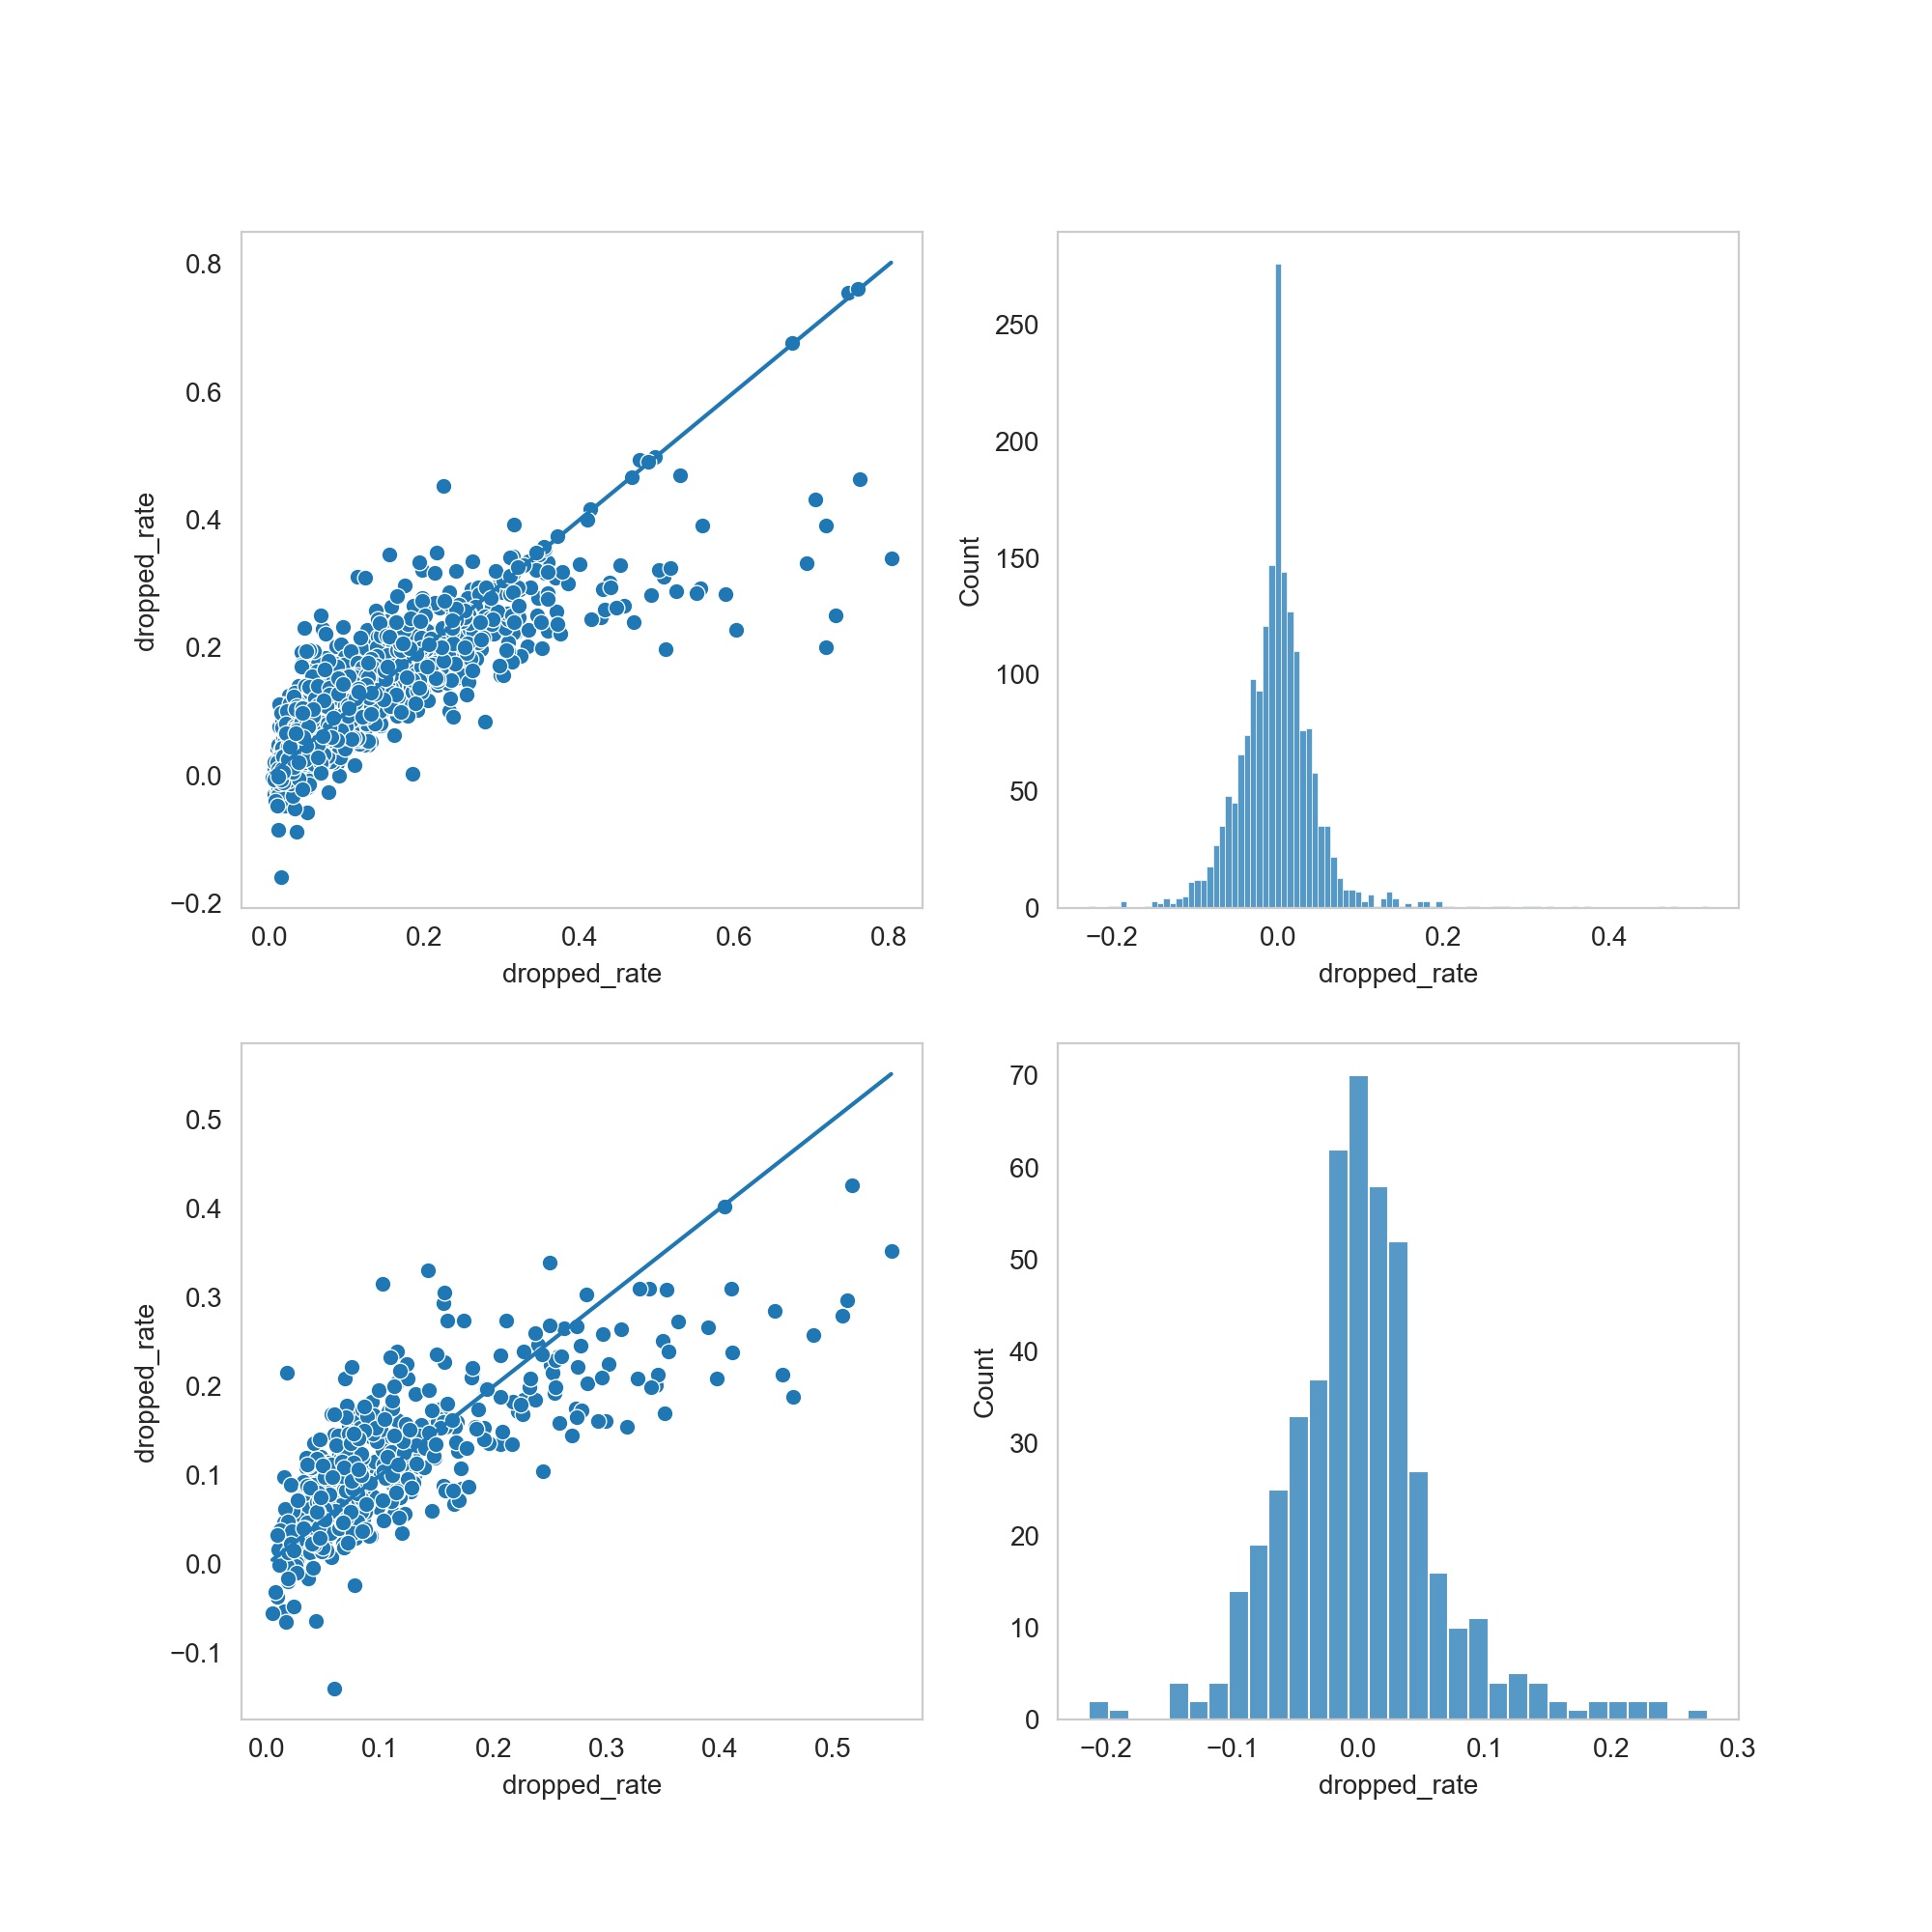

In [433]:
fig, ax=plt.subplots(2,2, figsize =(10,10))
sns.scatterplot(y=y_pred_train, x=y_train, ax=ax[0,0])
sns.lineplot(y=y_train, x=y_train, ax=ax[0,0])
sns.histplot(x=y_train-y_pred_train, ax=ax[0,1])
sns.scatterplot(y=y_pred_test, x=y_test, ax=ax[1,0])
sns.lineplot(y=y_test, x=y_test, ax=ax[1,0])
sns.histplot(x=y_test-y_pred_test, ax=ax[1,1])
plt.show()

# Try KNN-model


In [483]:
knn_models = []
scores = []
for k in range(2,15):
    knnmodel = KNeighborsRegressor(n_neighbors=k,  weights='distance')
    #print("Training the k-NN model with {} neihgbours...".format(k))
    knnmodel.fit( X_train_stand, y_train)
    knn_models.append(knnmodel)
    scores.append(knnmodel.score(X_test_stand, y_test))

In [485]:
for index,score in enumerate(scores):
    print("The R2 of the k-nn model with {} neighbours on the TEST set was: {:.2f}".format(index+2,score))

The R2 of the k-nn model with 2 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 3 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 4 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 5 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 6 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 7 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 8 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 9 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 10 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 11 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 12 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 13 neighbours on the TEST set was: 1.00
The R2 of the k-nn model with 14 neighbours on the TEST set was: 1.00


# MOST dropped top5

In [441]:
data6['total_watch'] = data6['completed'] + data6['dropped'] + data6['on-hold']
data6['dropped_rate'] =data6['dropped']/ data6['total_watch'] 
data6['dropped_rate']

0       0.032680
1       0.036369
2       0.094910
3       0.120592
4       0.105946
          ...   
2352    0.175793
2353    0.762009
2354    0.359075
2355    0.482076
2356    0.704852
Name: dropped_rate, Length: 2357, dtype: float64

In [457]:
data6.head()
data_anime_drop= data6.sort_values(by=['dropped_rate'], ascending = False)

data_anime_drop = data_anime_drop.iloc[[0,1,2,3,4],:]
data_anime_drop
data_anime_drop[['english_name','completed','on-hold','dropped','favorites','popularity','favorites','score','rating_tot']]

english_name  completed  on-hold  dropped  \
2317                              Redo of Healer         77     2838    11839   
2353  Dr. Ramune -Mysterious Disease Specialist-          7      538     1745   
2339                            Otherside Picnic          2     1280     4034   
2347         The Hidden Dungeon Only I Can Enter         21     1370     4106   
2165                   So I'm a Spider, So What?         19     1592     4365   

      favorites  popularity  favorites  score  rating_tot  
2317       2815         665       2815   6.22   -0.082139  
2353        121        2995        121   6.86    0.036555  
2339        340        1982        340   6.53   -0.010927  
2347       1362        1200       1362   6.47   -0.061869  
2165        834        1127        834   6.94   -0.100306

In [445]:
data_anime_drop.to_csv('Top5_data_anime_drop.csv')

<IPython.core.display.Javascript object>


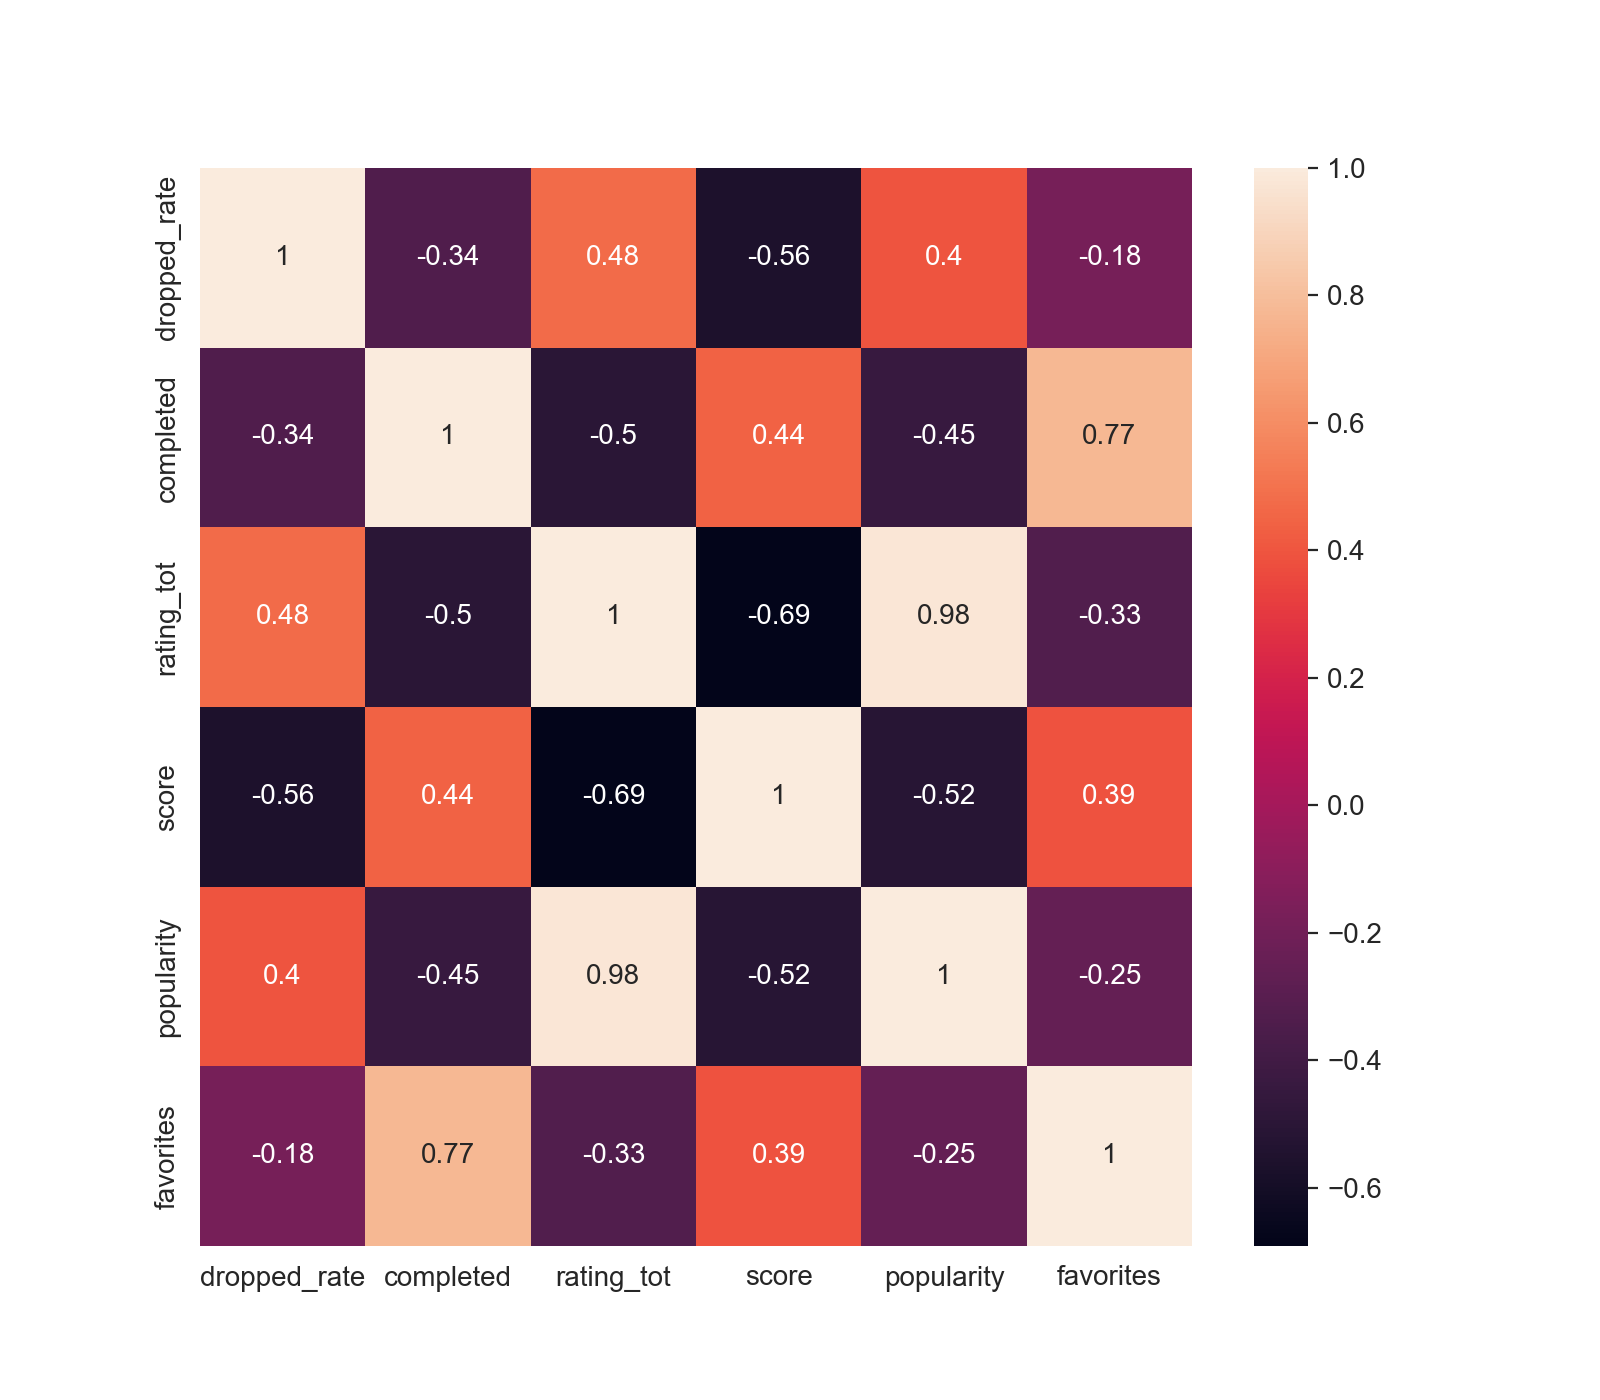

<AxesSubplot:>

In [454]:
correlations_matrix = data6[['dropped_rate','completed','rating_tot','score','popularity','favorites']].corr()
fig, ax=plt.subplots (figsize =(8,7))
sns.heatmap(correlations_matrix, annot=True) 